<h1> Min Max values as the basleine to make comparisons

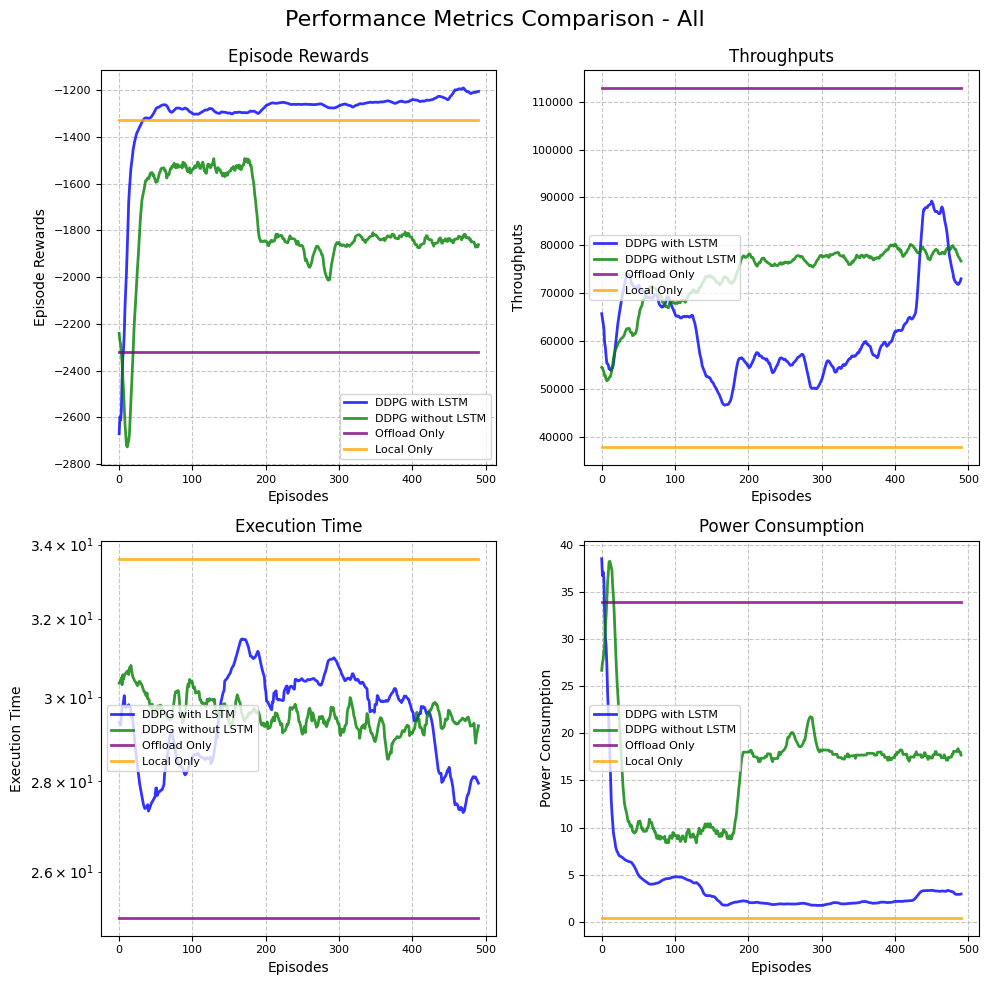


Quantitative Comparison Relative to DDPG with LSTM for All (Max for Rewards/Throughputs, Min for Time/Power):
+-------------------+-------------------+----------------+-------------------+
|      Metric       |      Method       | Baseline Value | Relative % Change |
+-------------------+-------------------+----------------+-------------------+
|  Episode Rewards  |  DDPG with LSTM   |    -1178.93    |       0.00%       |
|  Episode Rewards  | DDPG without LSTM |    -1178.93    |      -14.63%      |
|  Episode Rewards  |   Offload Only    |    -1178.93    |      -90.04%      |
|  Episode Rewards  |    Local Only     |    -1178.93    |      -12.60%      |
|    Throughputs    |  DDPG with LSTM   |    90444.31    |       0.00%       |
|    Throughputs    | DDPG without LSTM |    90444.31    |      -7.93%       |
|    Throughputs    |   Offload Only    |    90444.31    |      25.72%       |
|    Throughputs    |    Local Only     |    90444.31    |      -58.04%      |
|  Execution Time   

In [ ]:
# import pickle
# import matplotlib.pyplot as plt
# import numpy as np
# from tabulate import tabulate

# # Function to smooth data using a moving average
# def moving_average(data, window_size=10):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# # Load data from the pickle files
# with open('DDPG_with_LSTM.pkl', 'rb') as file:
#     saved_lists_with_LSTM_2 = pickle.load(file)

# with open('saved_lists_without_LSTM_.pkl', 'rb') as file:
#     saved_lists_without_LSTM = pickle.load(file)

# with open('offload_only.pkl', 'rb') as file:
#     offload_only = pickle.load(file)

# with open('local_only.pkl', 'rb') as file:
#     local_only = pickle.load(file)

# # Extract specific learning rate data
# lr_key = '10^-0'
# lstm_data = {metric: saved_lists_with_LSTM_2[metric][lr_key] for metric in saved_lists_with_LSTM_2.keys()}
# lr_key = '10^-4'
# offload_only_ = {metric: offload_only[metric][lr_key] for metric in offload_only.keys()}
# local_only_ = {metric: local_only[metric][lr_key] for metric in local_only.keys()}

# # Append local_only and offload_only to 50 times
# for metric in offload_only_.keys():
#     offload_only_[metric] = offload_only_[metric] * 50
# for metric in local_only_.keys():
#     local_only_[metric] = local_only_[metric] * 50

# # Define all metrics with full names (DQN removed)
# all_metrics = {
#     'DDPG with LSTM': lstm_data,
#     'DDPG without LSTM': saved_lists_without_LSTM,
#     'Offload Only': offload_only_,
#     'Local Only': local_only_
# }

# # Define plot combinations (DQN removed)
# plot_combinations = {
#     'All': ['DDPG with LSTM', 'DDPG without LSTM', 'Offload Only', 'Local Only']
# }

# # Define metric names with improved titles
# metric_titles = {
#     'episode_rewards': 'Episode Rewards',
#     'episode_throughputs': 'Throughputs',
#     'episode_Time_': 'Execution Time',
#     'episode_power_': 'Power Consumption'
# }

# # Define colors (DQN removed)
# colors = {
#     'DDPG with LSTM': 'blue',
#     'DDPG without LSTM': 'green',
#     'Offload Only': 'purple',
#     'Local Only': 'orange'
# }

# # Function to compute relative percentage improvement using max/min
# def compute_relative_improvement(baseline_data, compare_data, metric_name, is_better_higher=True):
#     if metric_name in baseline_data and metric_name in compare_data and len(baseline_data[metric_name]) > 0 and len(compare_data[metric_name]) > 0:
#         if is_better_higher:  # Use max for rewards and throughputs
#             baseline_value = np.max(baseline_data[metric_name])
#             compare_value = np.max(compare_data[metric_name])
#         else:  # Use min for time and power
#             baseline_value = np.min(baseline_data[metric_name])
#             compare_value = np.min(compare_data[metric_name])
        
#         if baseline_value == 0:  # Avoid division by zero
#             return None
#         if is_better_higher:  # Higher is better
#             percentage = ((compare_value - baseline_value) / abs(baseline_value)) * 100
#         else:  # Lower is better
#             percentage = ((baseline_value - compare_value) / abs(baseline_value)) * 100
#         return percentage
#     return None

# # Function to generate qualitative summary relative to DDPG with LSTM
# def generate_relative_qualitative_summary(combo_name, labels):
#     baseline = 'DDPG with LSTM'
#     summary = f"\nQualitative Comparison Relative to {baseline} for {combo_name.replace('_', ' ')} (Max for Rewards/Throughputs, Min for Time/Power):\n"
#     for metric_name, title in metric_titles.items():
#         summary += f"- {title}:\n"
#         baseline_data = all_metrics[baseline][metric_name]
#         baseline_trend = "stable" if np.std(baseline_data) < np.mean(baseline_data) * 0.1 else "variable"
#         baseline_smoothed = moving_average(baseline_data) if len(baseline_data) >= 10 else baseline_data
#         baseline_direction = "increasing" if baseline_smoothed[-1] > baseline_smoothed[0] else "decreasing" if baseline_smoothed[-1] < baseline_smoothed[0] else "flat"
        
#         for label in labels:
#             if label == baseline:
#                 ref_value = np.max(baseline_data) if metric_name in ['episode_rewards', 'episode_throughputs'] else np.min(baseline_data)
#                 summary += f"  * {label}: Baseline ({baseline_trend}, {baseline_direction}, Reference Value: {ref_value:.2f}).\n"
#             elif metric_name in all_metrics[label]:
#                 data = all_metrics[label][metric_name]
#                 trend = "stable" if np.std(data) < np.mean(data) * 0.1 else "variable"
#                 smoothed = moving_average(data) if len(data) >= 10 else data
#                 direction = "increasing" if smoothed[-1] > smoothed[0] else "decreasing" if smoothed[-1] < smoothed[0] else "flat"
#                 improvement = compute_relative_improvement(all_metrics[baseline], all_metrics[label], metric_name, 
#                                                           is_better_higher=(metric_name in ['episode_rewards', 'episode_throughputs']))
#                 if improvement is not None:
#                     if metric_name in ['episode_rewards', 'episode_throughputs']:
#                         change = "improvement" if improvement > 0 else "degradation"
#                     else:  # Time, Power
#                         change = "improvement" if improvement > 0 else "degradation"
#                     summary += f"  * {label}: {trend}, {direction}, {abs(improvement):.2f}% {change} relative to baseline.\n"
#                 else:
#                     summary += f"  * {label}: {trend}, {direction}, insufficient data for relative comparison.\n"
#     return summary

# # Function to generate grid plot and comparisons
# def generate_grid_plot(combo_name, labels):
#     metrics_to_plot = list(metric_titles.keys())
    
#     n_metrics = len(metrics_to_plot)
#     n_rows = 2
#     n_cols = int(np.ceil(n_metrics / 2))
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 10))
#     fig.suptitle(f'Performance Metrics Comparison - {combo_name.replace("_", " ")}', fontsize=16)
    
#     if n_metrics > 1:
#         axes = axes.flatten()
#     else:
#         axes = [axes]
    
#     for idx, metric_name in enumerate(metrics_to_plot):
#         ax = axes[idx]
#         for label in labels:
#             if metric_name in all_metrics[label]:
#                 data = all_metrics[label][metric_name]
#                 if len(data) >= 10:
#                     smoothed_data = moving_average(data, window_size=10)
#                     x = np.arange(len(smoothed_data))
#                     ax.plot(x, smoothed_data, label=label, color=colors[label], linewidth=2, alpha=0.8)
#                 else:
#                     ax.plot(data, label=label, color=colors[label], linewidth=2, alpha=0.8)
        
#         ax.set_title(metric_titles[metric_name], fontsize=12)
#         ax.set_xlabel('Episodes', fontsize=10)
#         ax.set_ylabel(metric_titles[metric_name], fontsize=10)
#         ax.legend(fontsize=8)
#         ax.grid(True, linestyle='--', alpha=0.7)
#         if metric_name == 'episode_Time_':
#             ax.set_yscale('log')
#         ax.tick_params(axis='both', which='major', labelsize=8)
    
#     for idx in range(n_metrics, len(axes)):
#         axes[idx].set_visible(False)
    
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.92)
#     plt.savefig(f'grid_plot_{combo_name}.png', bbox_inches='tight', dpi=300)
#     plt.show()
#     plt.close()

#     # Quantitative comparison relative to DDPG with LSTM using max/min
#     baseline = 'DDPG with LSTM'
#     quantitative_data = []
#     for metric_name in metrics_to_plot:
#         for label in labels:
#             improvement = compute_relative_improvement(all_metrics[baseline], all_metrics[label], metric_name, 
#                                                      is_better_higher=(metric_name in ['episode_rewards', 'episode_throughputs']))
#             ref_value = np.max(all_metrics[baseline][metric_name]) if metric_name in ['episode_rewards', 'episode_throughputs'] else np.min(all_metrics[baseline][metric_name])
#             quantitative_data.append([metric_titles[metric_name], label, 
#                                    f"{ref_value:.2f}", f"{improvement:.2f}%" if improvement is not None else 'N/A'])
    
#     print(f"\nQuantitative Comparison Relative to {baseline} for {combo_name.replace('_', ' ')} (Max for Rewards/Throughputs, Min for Time/Power):")
#     print(tabulate(quantitative_data, headers=['Metric', 'Method', 'Baseline Value', 'Relative % Change'], tablefmt='pretty'))

#     # Qualitative comparison
#     print(generate_relative_qualitative_summary(combo_name, labels))

# # Generate for the 'All' combination
# for combo_name, labels in plot_combinations.items():
#     generate_grid_plot(combo_name, labels)

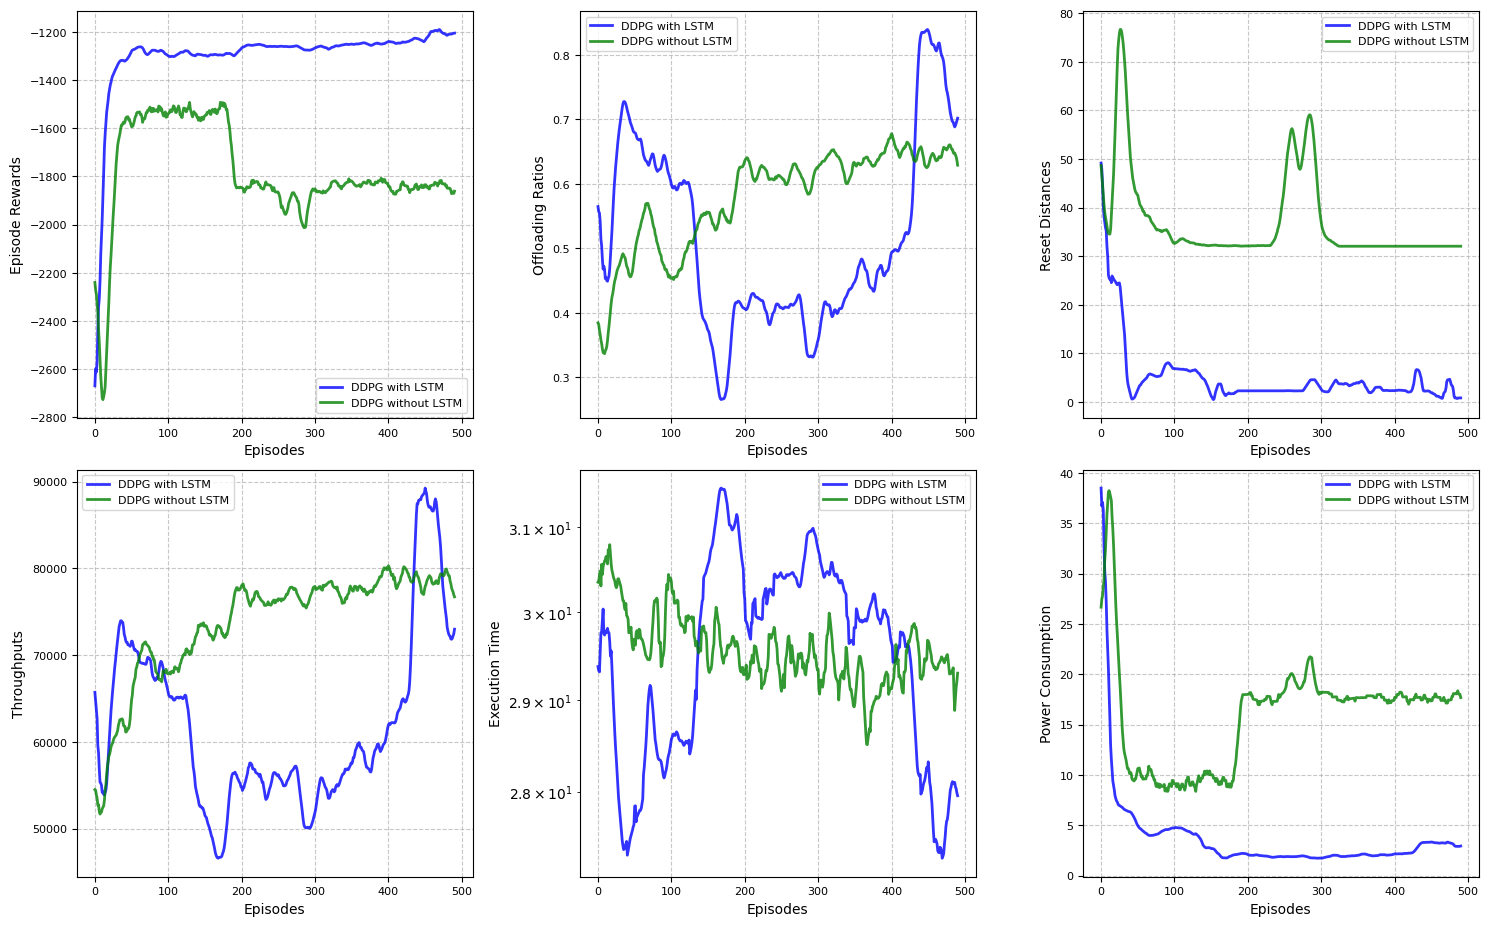

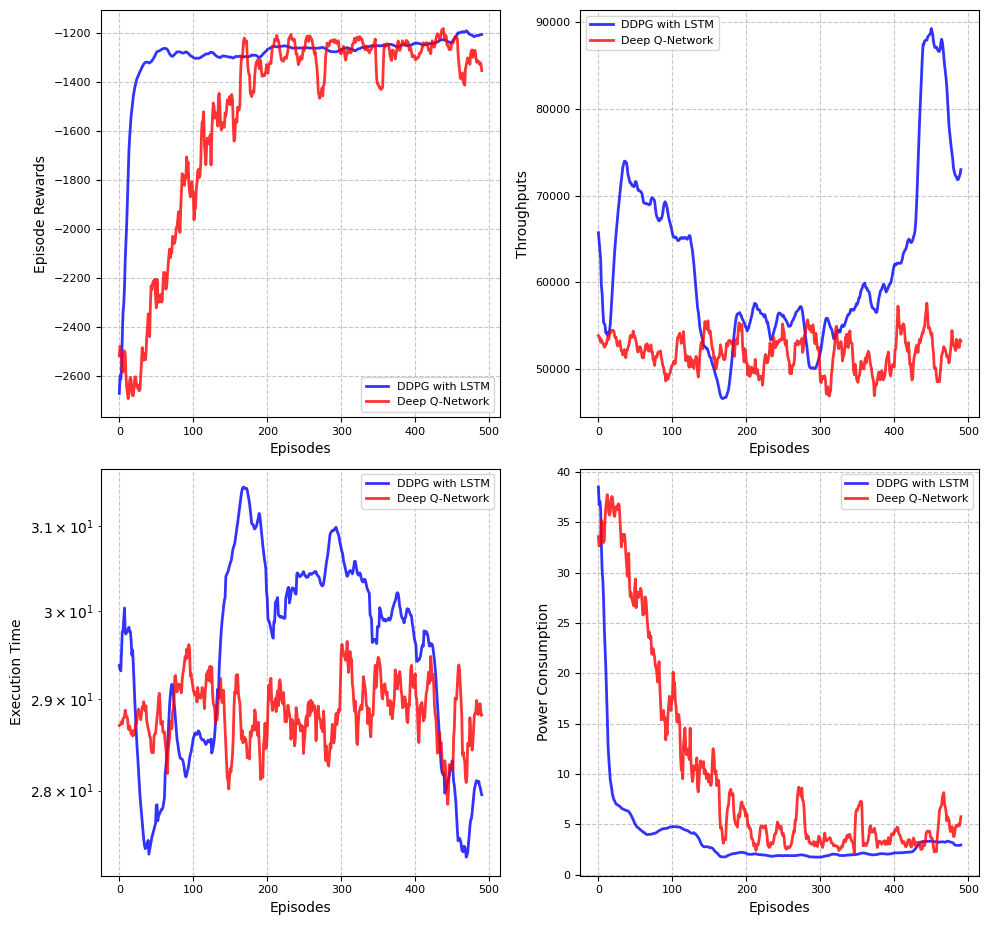

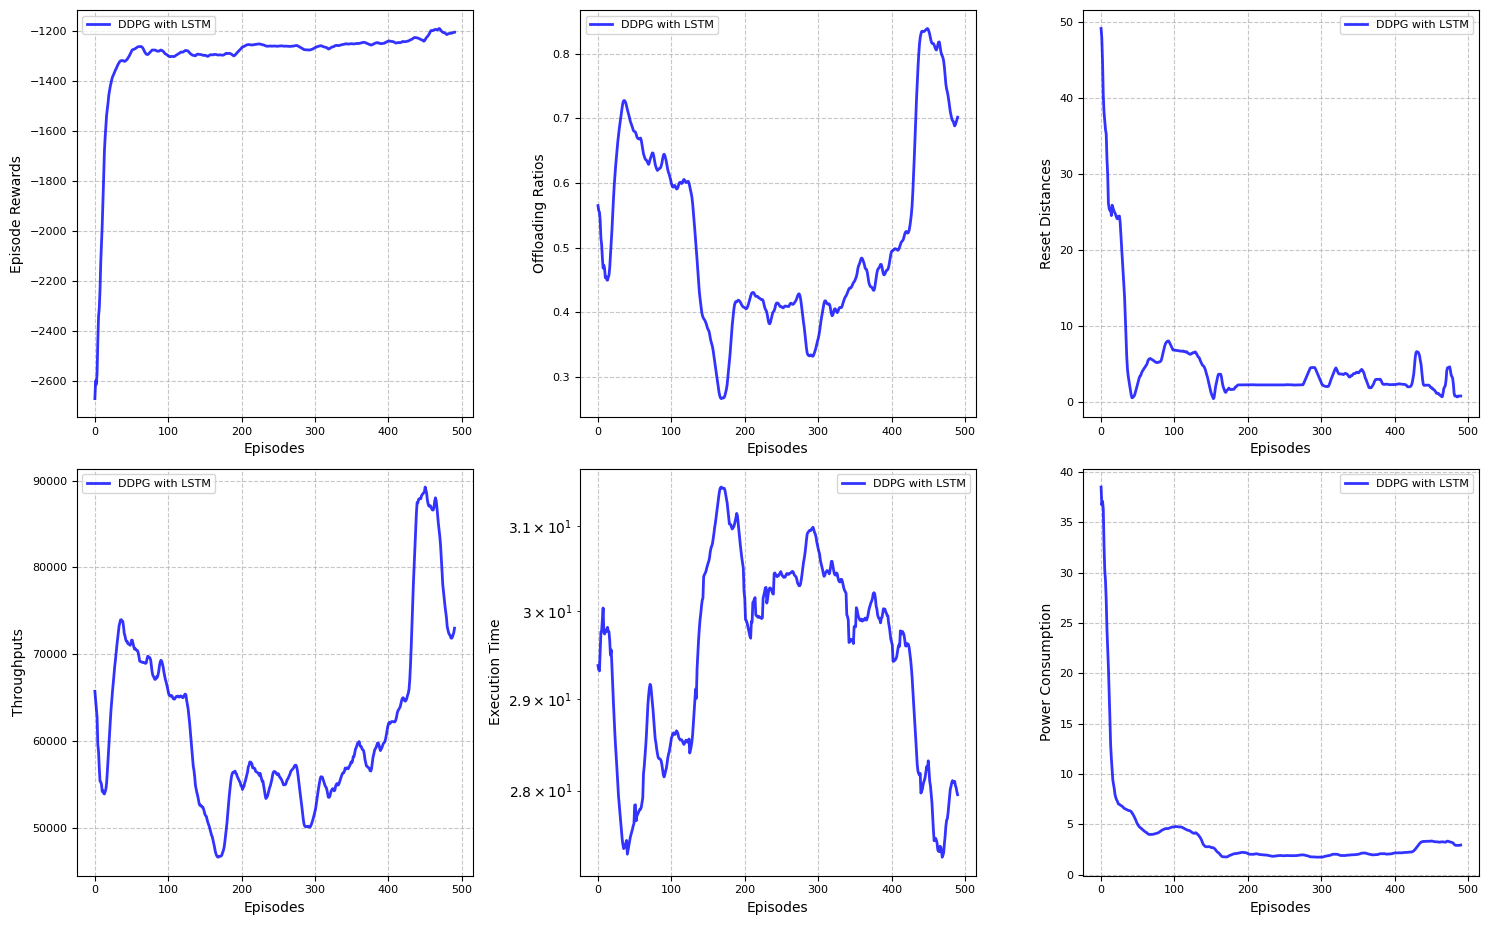

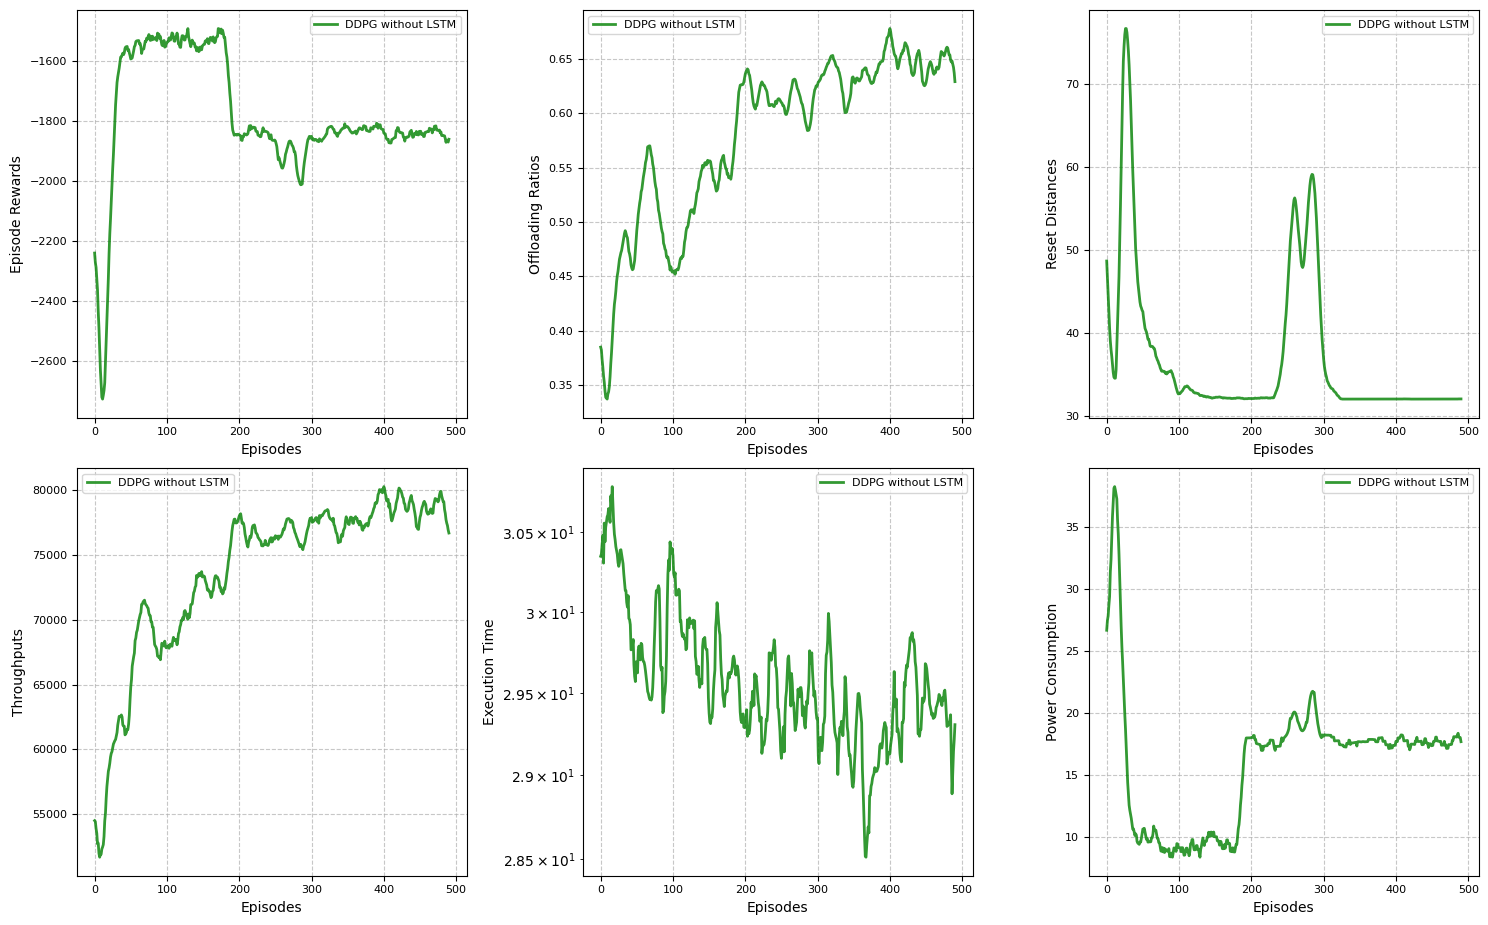

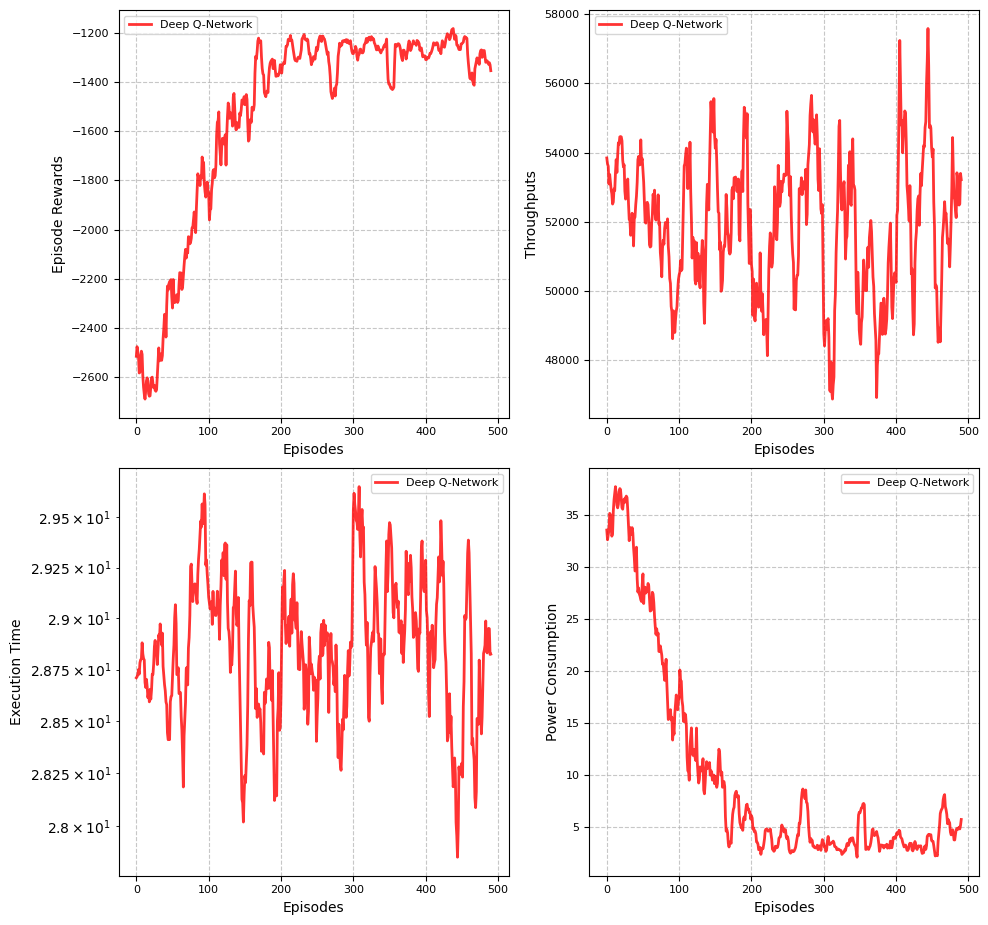

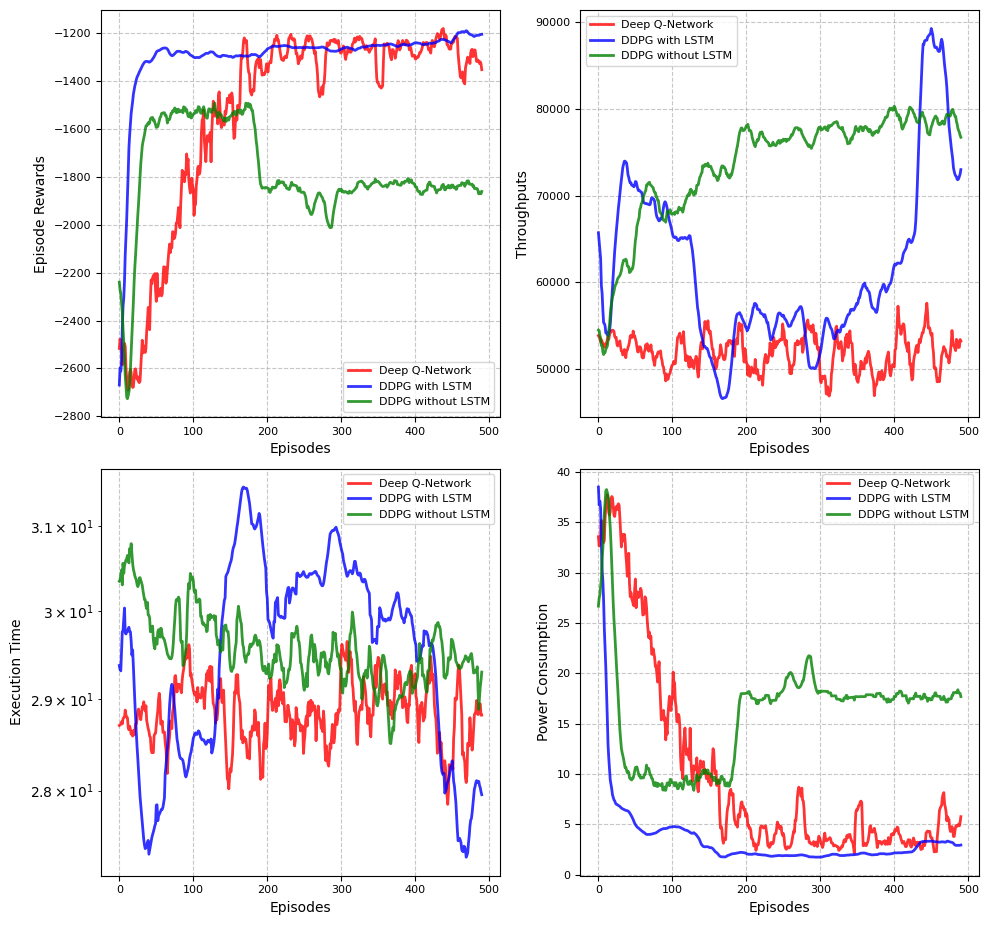

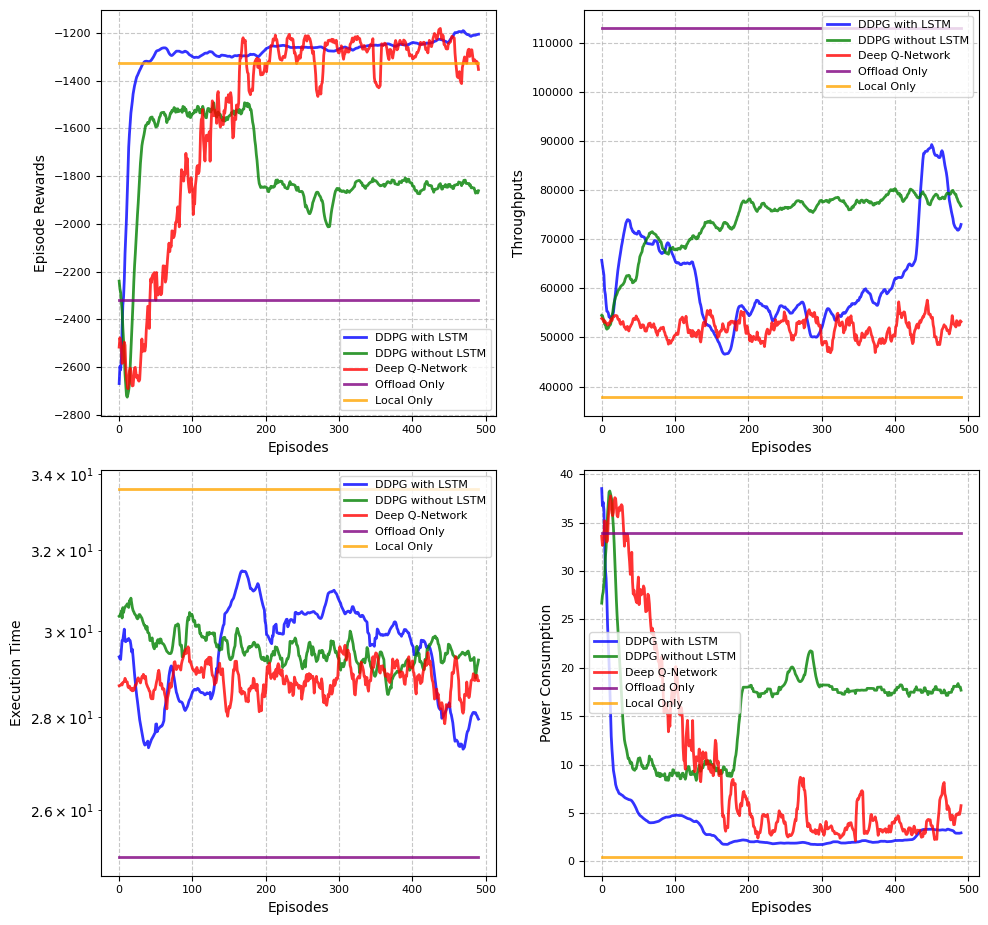

In [ ]:
# import pickle
# import matplotlib.pyplot as plt
# import numpy as np

# # Function to smooth data using a moving average
# def moving_average(data, window_size=10):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# # Load data from the pickle files
# with open('DDPG_with_LSTM.pkl', 'rb') as file:
#     saved_lists_with_LSTM_2 = pickle.load(file)

# with open('saved_lists_without_LSTM_.pkl', 'rb') as file:
#     saved_lists_without_LSTM = pickle.load(file)

# with open('saved_lists_DQN_.pkl', 'rb') as file:
#     saved_lists_DQN_ = pickle.load(file)

# with open('offload_only.pkl', 'rb') as file:
#     offload_only = pickle.load(file)

# with open('local_only.pkl', 'rb') as file:
#     local_only = pickle.load(file)

# # Extract specific learning rate data (1e-4)
# lr_key = '10^-0'
# lstm_data = {
#     metric: saved_lists_with_LSTM_2[metric][lr_key] 
#     for metric in saved_lists_with_LSTM_2.keys()
# }
# lr_key = '10^-4'
# offload_only_ = {
#     metric: offload_only[metric][lr_key] 
#     for metric in offload_only.keys()
# }
# local_only_ = {
#     metric: local_only[metric][lr_key] 
#     for metric in local_only.keys()
# }

# # Append local_only and offload_only to 50 times
# for metric in offload_only_.keys():
#     original_offload = offload_only_[metric]
#     offload_only_[metric] = original_offload * 50

# for metric in local_only_.keys():
#     original_local = local_only_[metric]
#     local_only_[metric] = original_local * 50

# # Define all metrics with full names
# all_metrics = {
#     'DDPG with LSTM': lstm_data,
#     'DDPG without LSTM': saved_lists_without_LSTM,
#     'Deep Q-Network': saved_lists_DQN_,
#     'Offload Only': offload_only_,
#     'Local Only': local_only_
# }

# # Define different plot combinations
# plot_combinations = {
#     'DDPG_with_LSTM_vs_DDPG_without_LSTM': ['DDPG with LSTM', 'DDPG without LSTM'],
#     'DDPG_with_LSTM_vs_DQN': ['DDPG with LSTM', 'Deep Q-Network'],
#     'DDPG_with_LSTM_only': ['DDPG with LSTM'],
#     'DDPG_without_LSTM_only': ['DDPG without LSTM'],
#     'DQN_only': ['Deep Q-Network'],
#     'DQN_DDPG_with_LSTM_DDPG_without': ['Deep Q-Network', 'DDPG with LSTM', 'DDPG without LSTM'],
#     'All': ['DDPG with LSTM', 'DDPG without LSTM', 'Deep Q-Network', 'Offload Only', 'Local Only']
# }

# # Define metric names with improved titles
# metric_titles = {
#     'episode_rewards': 'Episode Rewards',
#     'episode_offloading_ratios': 'Offloading Ratios',
#     'episode_reset_dists': 'Reset Distances',
#     'episode_throughputs': 'Throughputs',
#     'episode_Time_': 'Execution Time',
#     'episode_power_': 'Power Consumption'
# }

# # Define distinct colors for better contrast
# colors = {
#     'DDPG with LSTM': 'blue',
#     'DDPG without LSTM': 'green',
#     'Deep Q-Network': 'red',
#     'Offload Only': 'purple',
#     'Local Only': 'orange'
# }

# # Function to generate grid plot with improved visibility
# def generate_grid_plot(combo_name, labels):
#     has_dqn = 'Deep Q-Network' in labels
#     metrics_to_plot = list(metric_titles.keys())
#     if has_dqn:
#         metrics_to_plot = [m for m in metrics_to_plot if m not in ['episode_offloading_ratios', 'episode_reset_dists']]
    
#     n_metrics = len(metrics_to_plot)
#     n_rows = 2
#     n_cols = int(np.ceil(n_metrics / 2))
#     # Reduced figure size from (6*n_cols, 12) to (5*n_cols, 10)
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 10))
#     #fig.suptitle(f'Performance Metrics Comparison - {combo_name.replace("_", " ")}', fontsize=16)
    
#     if n_metrics > 1:
#         axes = axes.flatten()
#     else:
#         axes = [axes]
    
#     for idx, metric_name in enumerate(metrics_to_plot):
#         ax = axes[idx]
#         for label in labels:
#             if metric_name in all_metrics[label]:
#                 data = all_metrics[label][metric_name]
#                 if len(data) >= 10:
#                     smoothed_data = moving_average(data, window_size=10)
#                     x = np.arange(len(smoothed_data))
#                     ax.plot(x, smoothed_data, label=label, color=colors[label], 
#                             linewidth=2, alpha=0.8)
#                 else:
#                     ax.plot(data, label=label, color=colors[label], 
#                             linewidth=2, alpha=0.8)
#             else:
#                 print(f"Skipping {metric_name} for {label} as it does not exist.")
        
#         # Customize subplot appearance
#         #ax.set_title(metric_titles[metric_name], fontsize=12)
#         ax.set_xlabel('Episodes', fontsize=10)
#         ax.set_ylabel(metric_titles[metric_name], fontsize=10)
#         ax.legend(fontsize=8)
#         ax.grid(True, linestyle='--', alpha=0.7)
        
#         # Use logarithmic scale for Execution Time to better show decreases
#         if metric_name == 'episode_Time_':
#             ax.set_yscale('log')
#             #ax.set_ylim(bottom_min, custom_max)  # Replace with your data's min/max if known
        
#         ax.tick_params(axis='both', which='major', labelsize=8)
    
#     # Hide unused subplots
#     for idx in range(n_metrics, len(axes)):
#         axes[idx].set_visible(False)
    
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.92)
#     plt.savefig(f'grid_plot_{combo_name}.png', bbox_inches='tight', dpi=300)
#     plt.show()
#     plt.close()

# # Generate grid plots for each combination
# for combo_name, labels in plot_combinations.items():
#     generate_grid_plot(combo_name, labels)

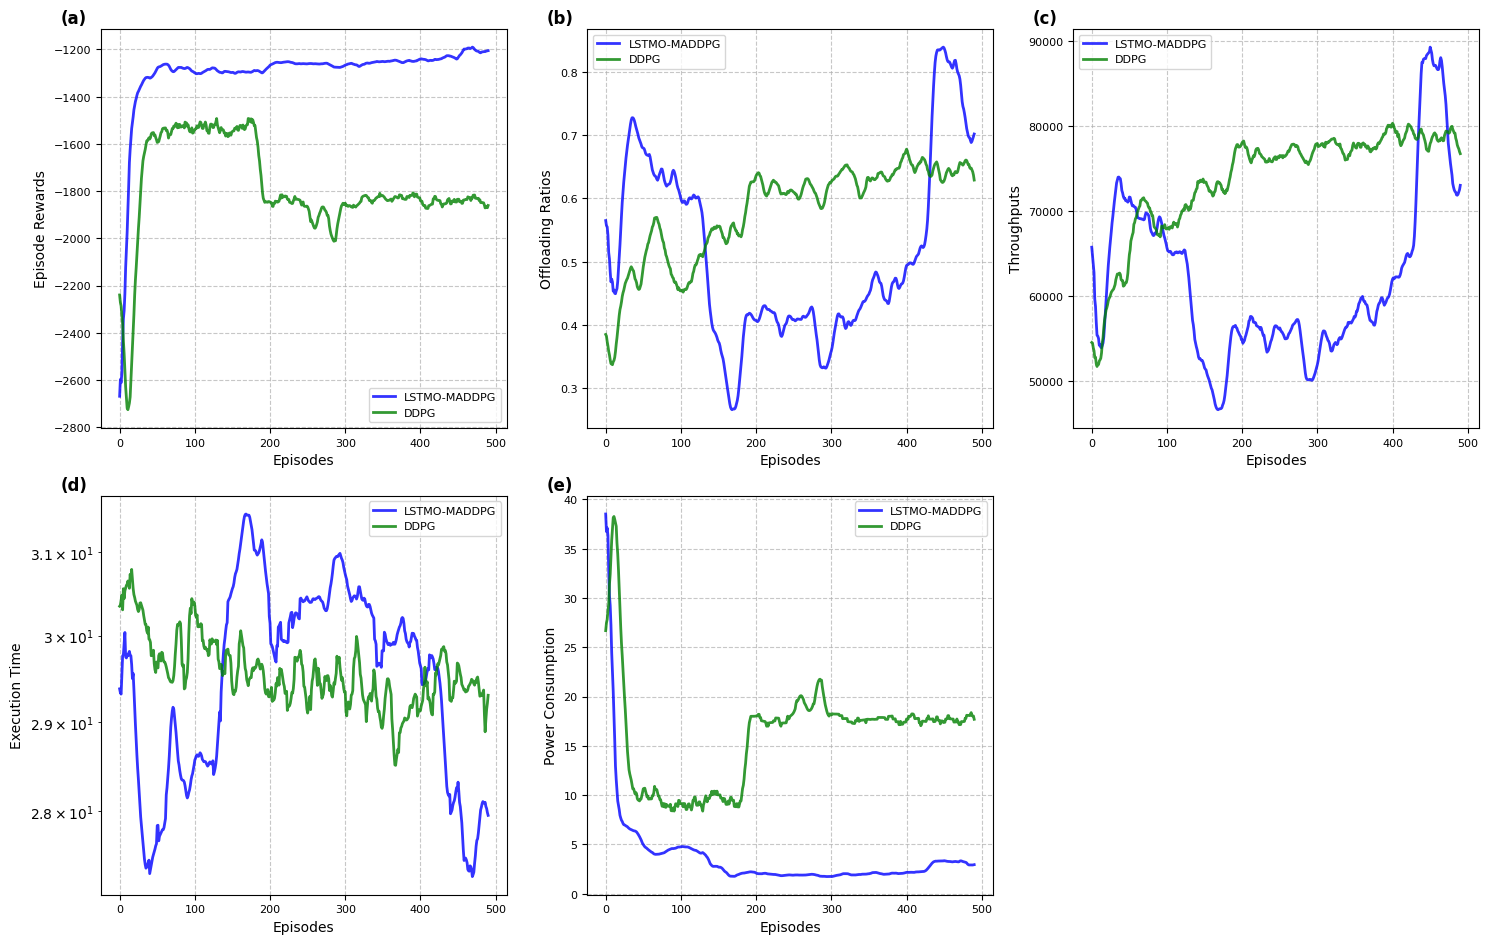

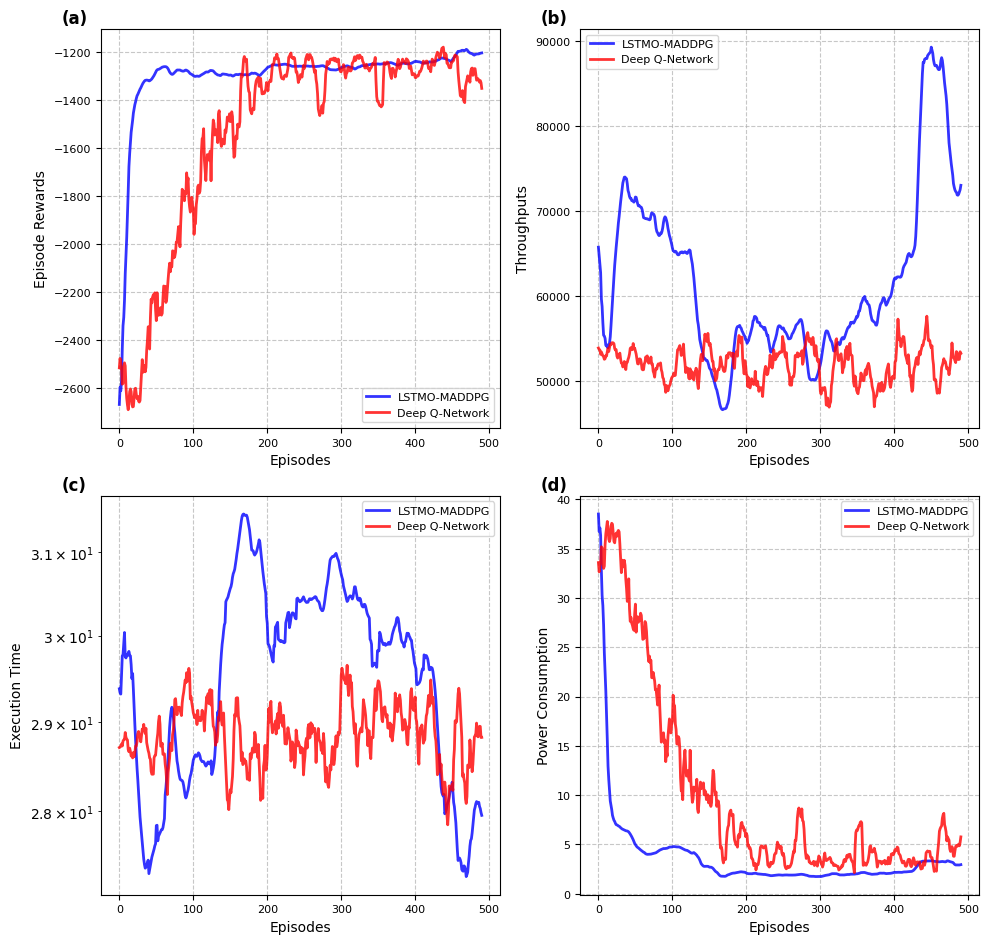

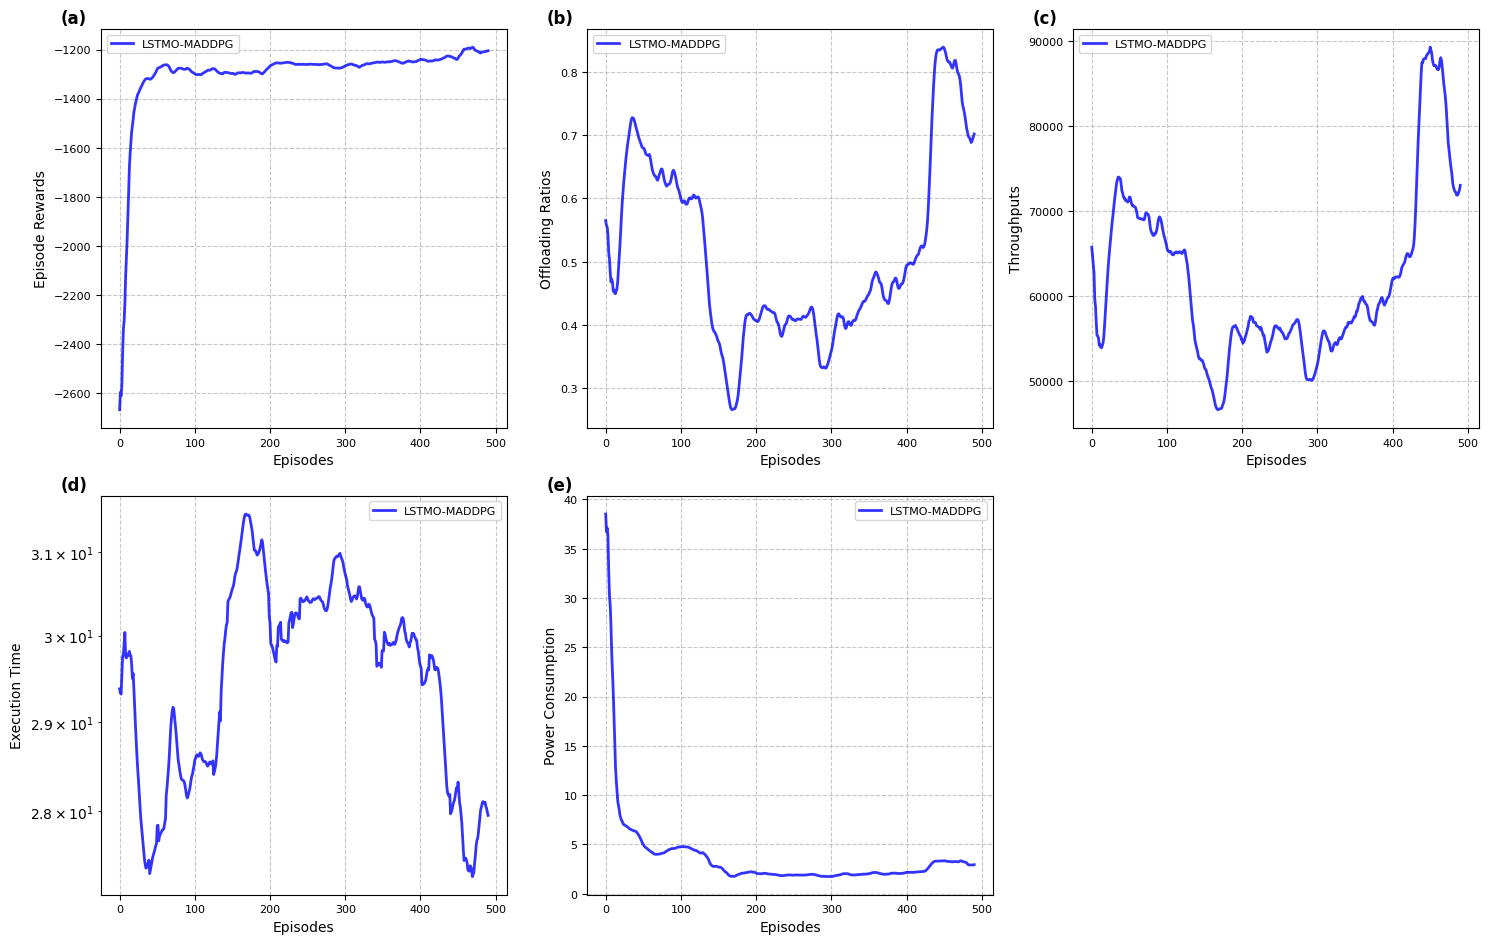

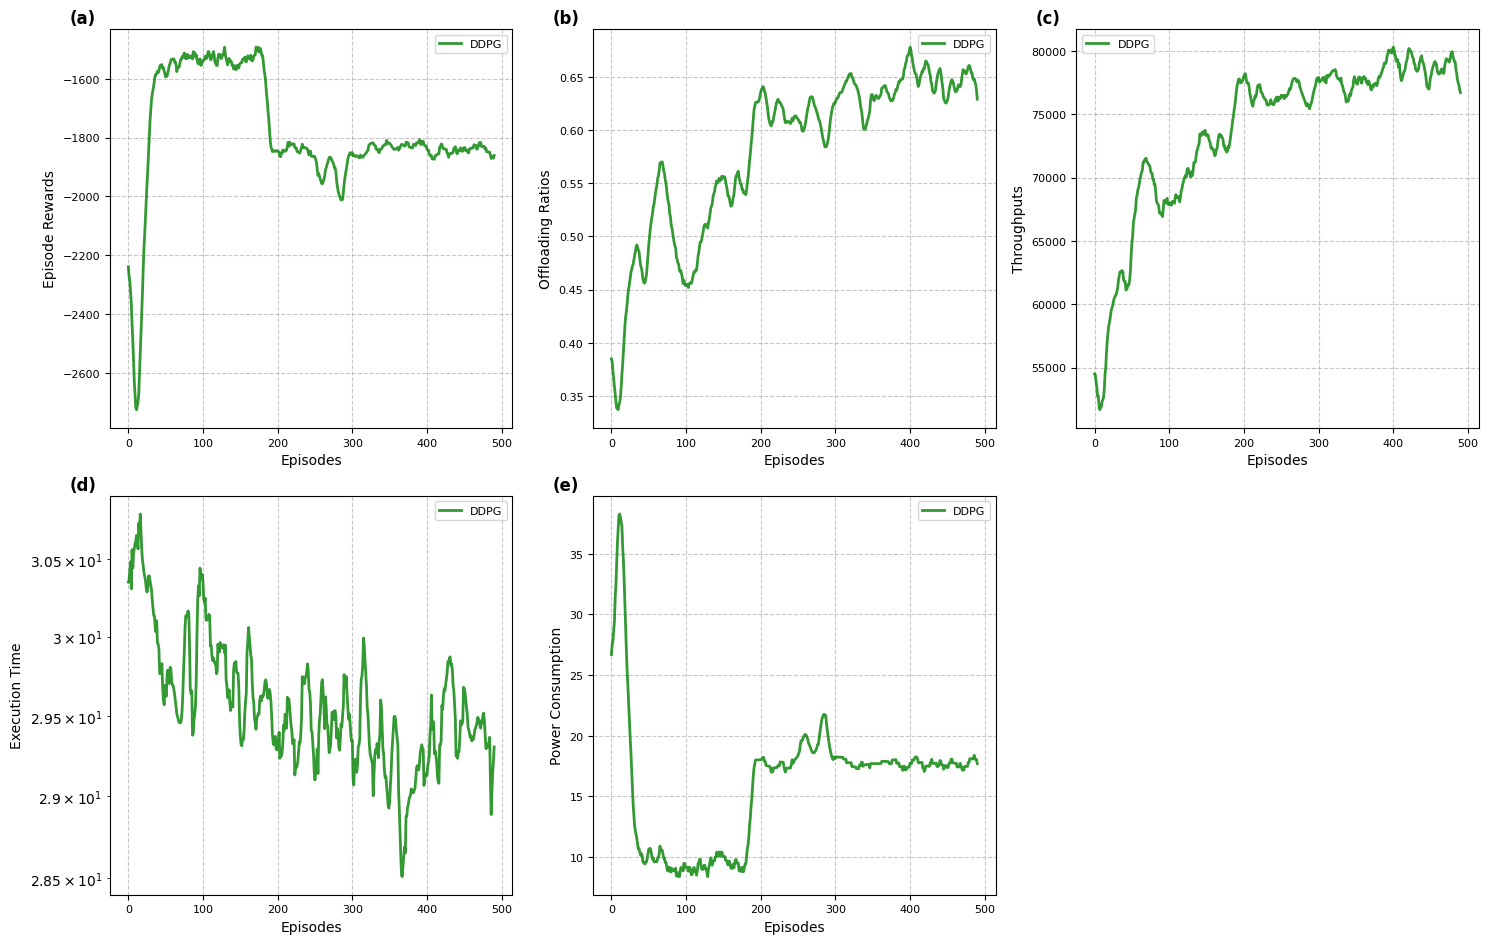

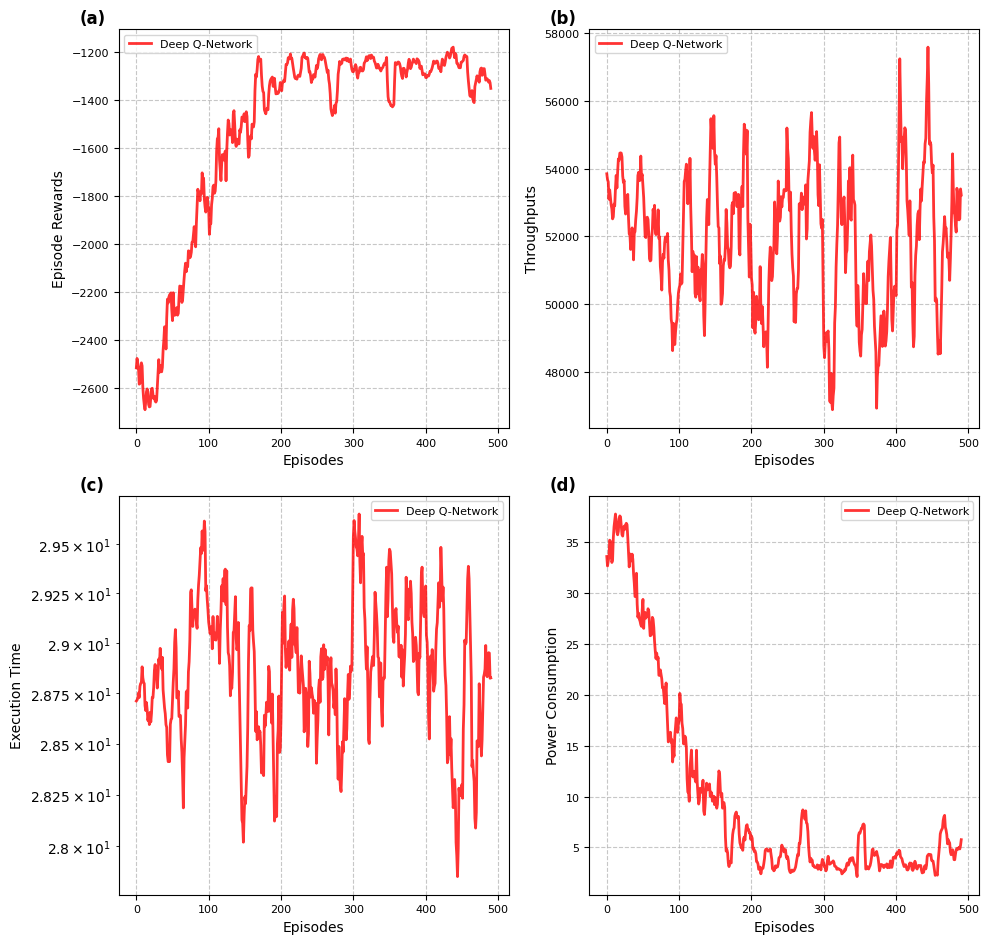

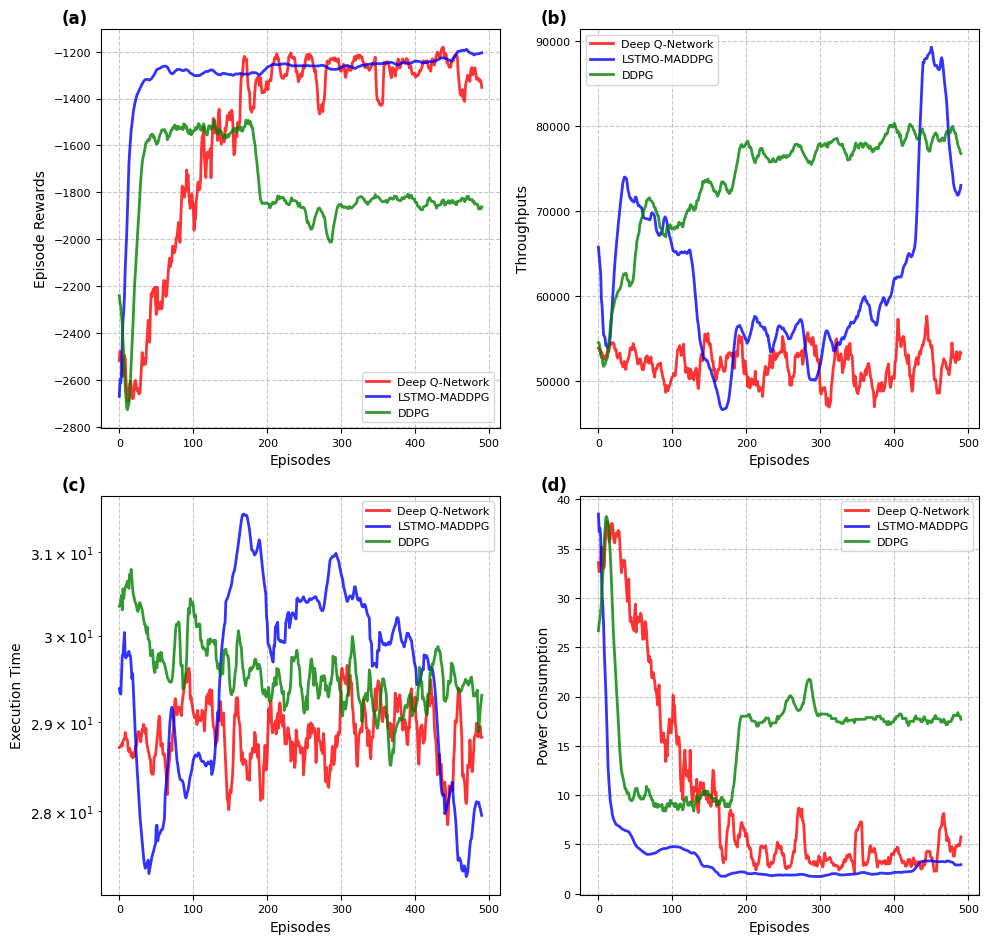

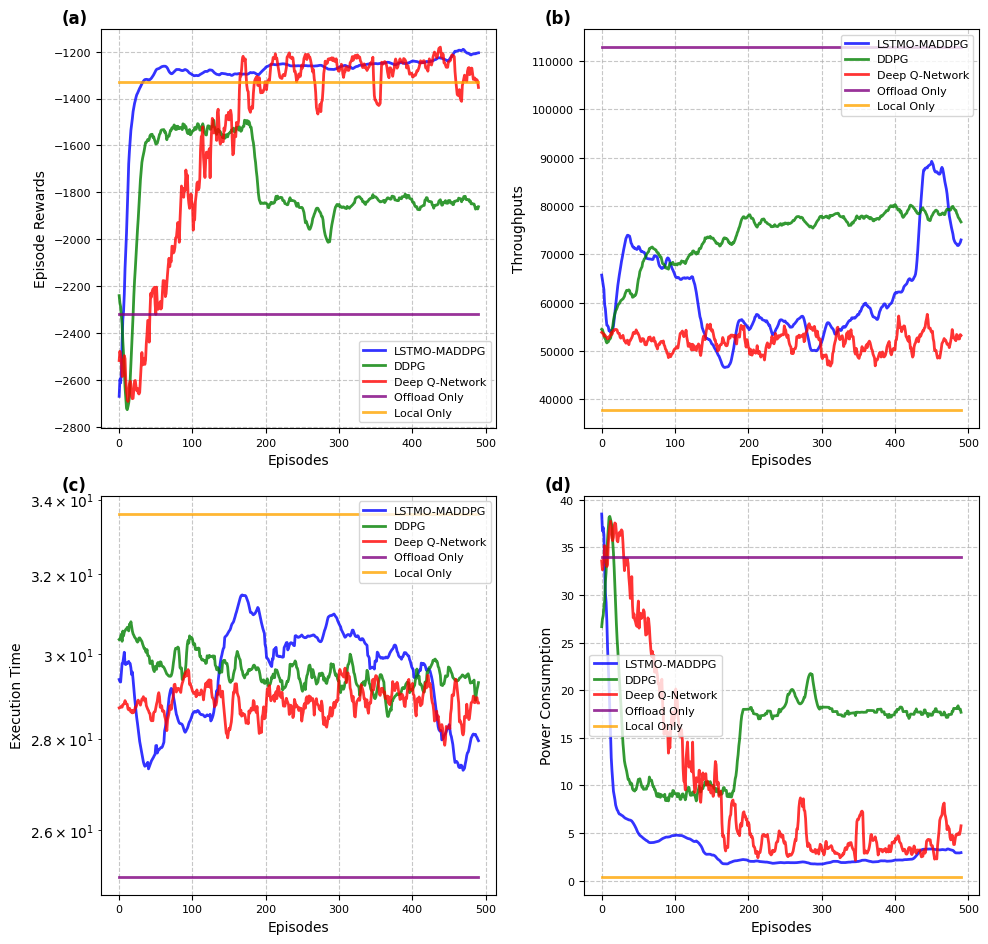

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Function to smooth data using a moving average
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Load data from the pickle files
with open('DDPG_with_LSTM.pkl', 'rb') as file:
    saved_lists_with_LSTM_2 = pickle.load(file)

with open('saved_lists_without_LSTM_.pkl', 'rb') as file:
    saved_lists_without_LSTM = pickle.load(file)

with open('saved_lists_DQN_.pkl', 'rb') as file:
    saved_lists_DQN_ = pickle.load(file)

with open('offload_only.pkl', 'rb') as file:
    offload_only = pickle.load(file)

with open('local_only.pkl', 'rb') as file:
    local_only = pickle.load(file)

# Extract specific learning rate data (1e-4)
lr_key = '10^-0'
lstm_data = {
    metric: saved_lists_with_LSTM_2[metric][lr_key] 
    for metric in saved_lists_with_LSTM_2.keys()
}
lr_key = '10^-4'
offload_only_ = {
    metric: offload_only[metric][lr_key] 
    for metric in offload_only.keys()
}
local_only_ = {
    metric: local_only[metric][lr_key] 
    for metric in local_only.keys()
}

# Append local_only and offload_only to 50 times
for metric in offload_only_.keys():
    original_offload = offload_only_[metric]
    offload_only_[metric] = original_offload * 50

for metric in local_only_.keys():
    original_local = local_only_[metric]
    local_only_[metric] = original_local * 50

# Define all metrics with updated names
all_metrics = {
    'LSTMO-MADDPG': lstm_data,
    'DDPG': saved_lists_without_LSTM,
    'Deep Q-Network': saved_lists_DQN_,
    'Offload Only': offload_only_,
    'Local Only': local_only_
}

# Define different plot combinations with updated labels
plot_combinations = {
    'LSTMO_MADDPG_vs_DDPG': ['LSTMO-MADDPG', 'DDPG'],
    'LSTMO_MADDPG_vs_DQN': ['LSTMO-MADDPG', 'Deep Q-Network'],
    'LSTMO_MADDPG_only': ['LSTMO-MADDPG'],
    'DDPG_only': ['DDPG'],
    'DQN_only': ['Deep Q-Network'],
    'DQN_LSTMO_MADDPG_DDPG': ['Deep Q-Network', 'LSTMO-MADDPG', 'DDPG'],
    'All': ['LSTMO-MADDPG', 'DDPG', 'Deep Q-Network', 'Offload Only', 'Local Only']
}

# Define metric names with improved titles (removed episode_reset_dists)
metric_titles = {
    'episode_rewards': 'Episode Rewards',
    'episode_offloading_ratios': 'Offloading Ratios',
    'episode_throughputs': 'Throughputs',
    'episode_Time_': 'Execution Time',
    'episode_power_': 'Power Consumption'
}

# Define distinct colors for better contrast
colors = {
    'LSTMO-MADDPG': 'blue',
    'DDPG': 'green',
    'Deep Q-Network': 'red',
    'Offload Only': 'purple',
    'Local Only': 'orange'
}

# Function to generate grid plot with improved visibility
def generate_grid_plot(combo_name, labels):
    has_dqn = 'Deep Q-Network' in labels
    metrics_to_plot = list(metric_titles.keys())
    if has_dqn:
        metrics_to_plot = [m for m in metrics_to_plot if m != 'episode_offloading_ratios']
    
    n_metrics = len(metrics_to_plot)
    n_rows = 2
    n_cols = int(np.ceil(n_metrics / 2))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 10))
    
    if n_metrics > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # Define subplot labels (a, b, c, ...)
    subplot_labels = [chr(97 + i) for i in range(n_metrics)]  # 97 is ASCII for 'a'
    
    for idx, metric_name in enumerate(metrics_to_plot):
        ax = axes[idx]
        for label in labels:
            if metric_name in all_metrics[label]:
                data = all_metrics[label][metric_name]
                if len(data) >= 10:
                    smoothed_data = moving_average(data, window_size=10)
                    x = np.arange(len(smoothed_data))
                    ax.plot(x, smoothed_data, label=label, color=colors[label], 
                            linewidth=2, alpha=0.8)
                else:
                    ax.plot(data, label=label, color=colors[label], 
                            linewidth=2, alpha=0.8)
            else:
                print(f"Skipping {metric_name} for {label} as it does not exist.")
        
        # Add subplot label (a, b, c, ...)
        ax.text(-0.1, 1.05, f'({subplot_labels[idx]})', transform=ax.transAxes, 
                fontsize=12, fontweight='bold', va='top')
        
        # Customize subplot appearance
        ax.set_xlabel('Episodes', fontsize=10)
        ax.set_ylabel(metric_titles[metric_name], fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Use logarithmic scale for Execution Time
        if metric_name == 'episode_Time_':
            ax.set_yscale('log')
        
        ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Hide unused subplots
    for idx in range(n_metrics, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(f'grid_plot_{combo_name}.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate grid plots for each combination
for combo_name, labels in plot_combinations.items():
    generate_grid_plot(combo_name, labels)

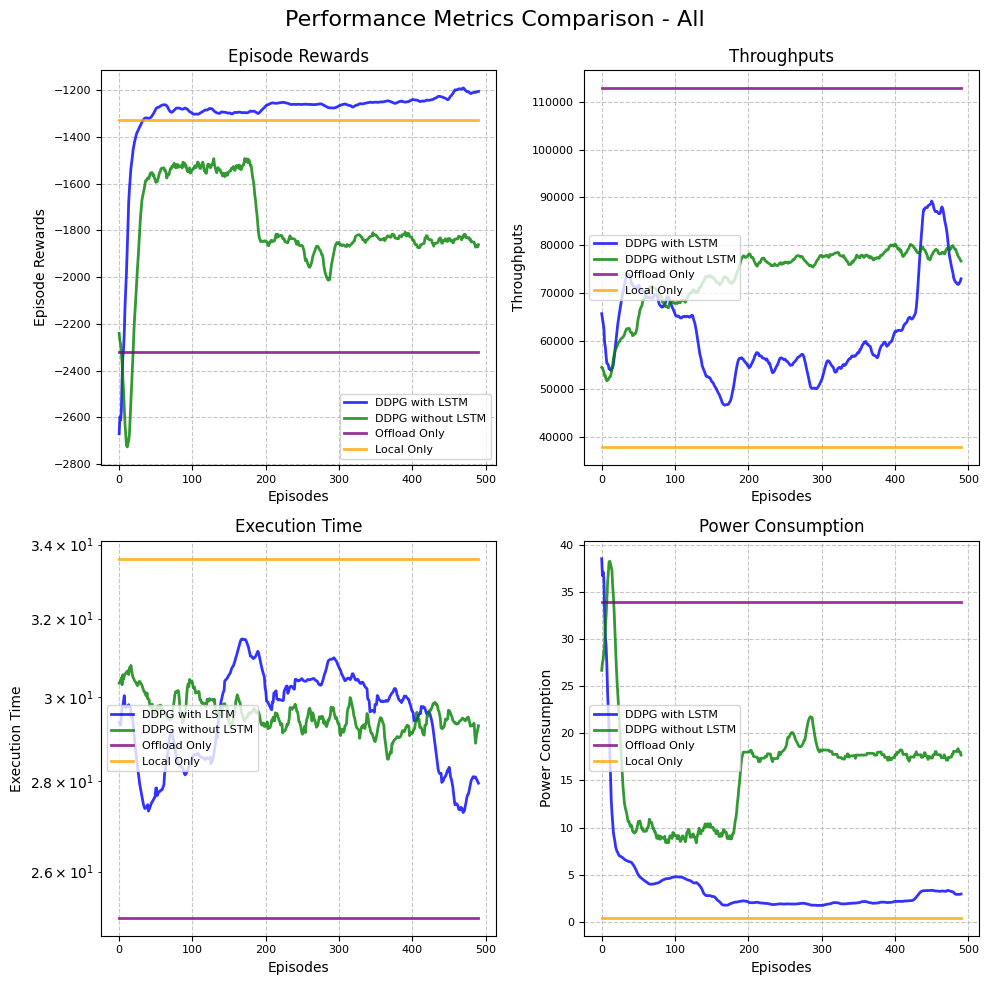


Quantitative Comparison Relative to DDPG with LSTM for All (Avg of Last 50 Episodes):
+-------------------+-------------------+----------------+-------------------+
|      Metric       |      Method       | Baseline Value | Relative % Change |
+-------------------+-------------------+----------------+-------------------+
|  Episode Rewards  |  DDPG with LSTM   |    -1209.00    |       0.00%       |
|  Episode Rewards  | DDPG without LSTM |    -1209.00    |      -52.15%      |
|  Episode Rewards  |   Offload Only    |    -1209.00    |      -91.80%      |
|  Episode Rewards  |    Local Only     |    -1209.00    |      -9.80%       |
|    Throughputs    |  DDPG with LSTM   |    81115.07    |       0.00%       |
|    Throughputs    | DDPG without LSTM |    81115.07    |      -3.45%       |
|    Throughputs    |   Offload Only    |    81115.07    |      39.17%       |
|    Throughputs    |    Local Only     |    81115.07    |      -53.34%      |
|  Execution Time   |  DDPG with LSTM   |   

In [ ]:
# import pickle
# import matplotlib.pyplot as plt
# import numpy as np
# from tabulate import tabulate

# # Function to smooth data using a moving average
# def moving_average(data, window_size=10):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# # Load data from the pickle files
# with open('DDPG_with_LSTM.pkl', 'rb') as file:
#     saved_lists_with_LSTM_2 = pickle.load(file)

# with open('saved_lists_without_LSTM_.pkl', 'rb') as file:
#     saved_lists_without_LSTM = pickle.load(file)

# with open('offload_only.pkl', 'rb') as file:
#     offload_only = pickle.load(file)

# with open('local_only.pkl', 'rb') as file:
#     local_only = pickle.load(file)

# # Extract specific learning rate data
# lr_key = '10^-0'
# lstm_data = {metric: saved_lists_with_LSTM_2[metric][lr_key] for metric in saved_lists_with_LSTM_2.keys()}
# lr_key = '10^-4'
# offload_only_ = {metric: offload_only[metric][lr_key] for metric in offload_only.keys()}
# local_only_ = {metric: local_only[metric][lr_key] for metric in local_only.keys()}

# # Append local_only and offload_only to 50 times
# for metric in offload_only_.keys():
#     offload_only_[metric] = offload_only_[metric] * 50
# for metric in local_only_.keys():
#     local_only_[metric] = local_only_[metric] * 50

# # Define all metrics with full names
# all_metrics = {
#     'DDPG with LSTM': lstm_data,
#     'DDPG without LSTM': saved_lists_without_LSTM,
#     'Offload Only': offload_only_,
#     'Local Only': local_only_
# }

# # Define plot combinations
# plot_combinations = {
#     'All': ['DDPG with LSTM', 'DDPG without LSTM', 'Offload Only', 'Local Only']
# }

# # Define metric names with improved titles
# metric_titles = {
#     'episode_rewards': 'Episode Rewards',
#     'episode_throughputs': 'Throughputs',
#     'episode_Time_': 'Execution Time',
#     'episode_power_': 'Power Consumption'
# }

# # Define colors
# colors = {
#     'DDPG with LSTM': 'blue',
#     'DDPG without LSTM': 'green',
#     'Offload Only': 'purple',
#     'Local Only': 'orange'
# }

# # Function to compute relative percentage improvement using average of last 50 episodes
# def compute_relative_improvement(baseline_data, compare_data, metric_name, is_better_higher=True):
#     if metric_name in baseline_data and metric_name in compare_data and len(baseline_data[metric_name]) > 0 and len(compare_data[metric_name]) > 0:
#         baseline_value = np.mean(baseline_data[metric_name][-50:]) if len(baseline_data[metric_name]) >= 50 else np.mean(baseline_data[metric_name])
#         compare_value = np.mean(compare_data[metric_name][-50:]) if len(compare_data[metric_name]) >= 50 else np.mean(compare_data[metric_name])
        
#         if baseline_value == 0:  # Avoid division by zero
#             return None
#         if is_better_higher:  # Higher is better
#             percentage = ((compare_value - baseline_value) / abs(baseline_value)) * 100
#         else:  # Lower is better
#             percentage = ((baseline_value - compare_value) / abs(baseline_value)) * 100
#         return percentage
#     return None

# # Function to generate qualitative summary relative to DDPG with LSTM
# def generate_relative_qualitative_summary(combo_name, labels):
#     baseline = 'DDPG with LSTM'
#     summary = f"\nQualitative Comparison Relative to {baseline} for {combo_name.replace('_', ' ')} (Avg of Last 50 Episodes):\n"
#     for metric_name, title in metric_titles.items():
#         summary += f"- {title}:\n"
#         baseline_data = all_metrics[baseline][metric_name]
#         baseline_trend = "stable" if np.std(baseline_data) < np.mean(baseline_data) * 0.1 else "variable"
#         baseline_smoothed = moving_average(baseline_data) if len(baseline_data) >= 10 else baseline_data
#         baseline_direction = "increasing" if baseline_smoothed[-1] > baseline_smoothed[0] else "decreasing" if baseline_smoothed[-1] < baseline_smoothed[0] else "flat"
        
#         for label in labels:
#             if label == baseline:
#                 ref_value = np.mean(baseline_data[-50:]) if len(baseline_data) >= 50 else np.mean(baseline_data)
#                 summary += f"  * {label}: Baseline ({baseline_trend}, {baseline_direction}, Reference Value: {ref_value:.2f}).\n"
#             elif metric_name in all_metrics[label]:
#                 data = all_metrics[label][metric_name]
#                 trend = "stable" if np.std(data) < np.mean(data) * 0.1 else "variable"
#                 smoothed = moving_average(data) if len(data) >= 10 else data
#                 direction = "increasing" if smoothed[-1] > smoothed[0] else "decreasing" if smoothed[-1] < smoothed[0] else "flat"
#                 improvement = compute_relative_improvement(all_metrics[baseline], all_metrics[label], metric_name, 
#                                                           is_better_higher=(metric_name in ['episode_rewards', 'episode_throughputs']))
#                 if improvement is not None:
#                     if metric_name in ['episode_rewards', 'episode_throughputs']:
#                         change = "improvement" if improvement > 0 else "degradation"
#                     else:  # Time, Power
#                         change = "improvement" if improvement > 0 else "degradation"
#                     summary += f"  * {label}: {trend}, {direction}, {abs(improvement):.2f}% {change} relative to baseline.\n"
#                 else:
#                     summary += f"  * {label}: {trend}, {direction}, insufficient data for relative comparison.\n"
#     return summary

# # Function to generate grid plot and comparisons
# def generate_grid_plot(combo_name, labels):
#     metrics_to_plot = list(metric_titles.keys())
    
#     n_metrics = len(metrics_to_plot)
#     n_rows = 2
#     n_cols = int(np.ceil(n_metrics / 2))
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 10))
#     fig.suptitle(f'Performance Metrics Comparison - {combo_name.replace("_", " ")}', fontsize=16)
    
#     if n_metrics > 1:
#         axes = axes.flatten()
#     else:
#         axes = [axes]
    
#     for idx, metric_name in enumerate(metrics_to_plot):
#         ax = axes[idx]
#         for label in labels:
#             if metric_name in all_metrics[label]:
#                 data = all_metrics[label][metric_name]
#                 if len(data) >= 10:
#                     smoothed_data = moving_average(data, window_size=10)
#                     x = np.arange(len(smoothed_data))
#                     ax.plot(x, smoothed_data, label=label, color=colors[label], linewidth=2, alpha=0.8)
#                 else:
#                     ax.plot(data, label=label, color=colors[label], linewidth=2, alpha=0.8)
        
#         ax.set_title(metric_titles[metric_name], fontsize=12)
#         ax.set_xlabel('Episodes', fontsize=10)
#         ax.set_ylabel(metric_titles[metric_name], fontsize=10)
#         ax.legend(fontsize=8)
#         ax.grid(True, linestyle='--', alpha=0.7)
#         if metric_name == 'episode_Time_':
#             ax.set_yscale('log')
#         ax.tick_params(axis='both', which='major', labelsize=8)
    
#     for idx in range(n_metrics, len(axes)):
#         axes[idx].set_visible(False)
    
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.92)
#     plt.savefig(f'grid_plot_{combo_name}.png', bbox_inches='tight', dpi=300)
#     plt.show()
#     plt.close()

#     # Quantitative comparison relative to DDPG with LSTM using average of last 50 episodes
#     baseline = 'DDPG with LSTM'
#     quantitative_data = []
#     for metric_name in metrics_to_plot:
#         for label in labels:
#             improvement = compute_relative_improvement(all_metrics[baseline], all_metrics[label], metric_name, 
#                                                      is_better_higher=(metric_name in ['episode_rewards', 'episode_throughputs']))
#             ref_value = np.mean(all_metrics[baseline][metric_name][-50:]) if len(all_metrics[baseline][metric_name]) >= 50 else np.mean(all_metrics[baseline][metric_name])
#             quantitative_data.append([metric_titles[metric_name], label, 
#                                    f"{ref_value:.2f}", f"{improvement:.2f}%" if improvement is not None else 'N/A'])
    
#     print(f"\nQuantitative Comparison Relative to {baseline} for {combo_name.replace('_', ' ')} (Avg of Last 50 Episodes):")
#     print(tabulate(quantitative_data, headers=['Metric', 'Method', 'Baseline Value', 'Relative % Change'], tablefmt='pretty'))

#     # Qualitative comparison
#     print(generate_relative_qualitative_summary(combo_name, labels))

# # Generate for the 'All' combination
# for combo_name, labels in plot_combinations.items():
#     generate_grid_plot(combo_name, labels)

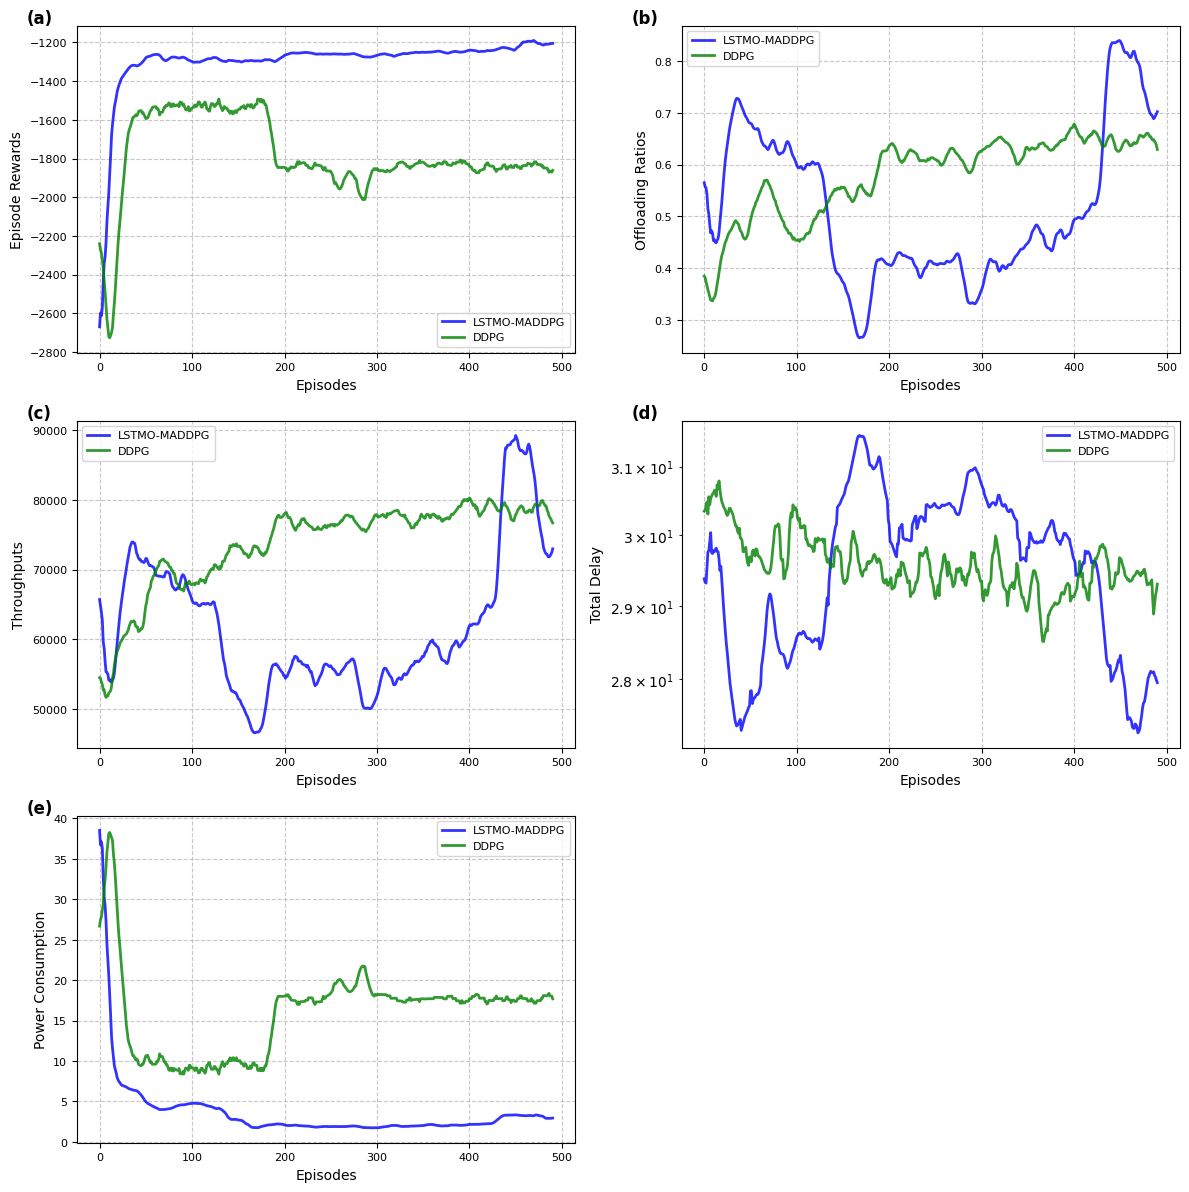

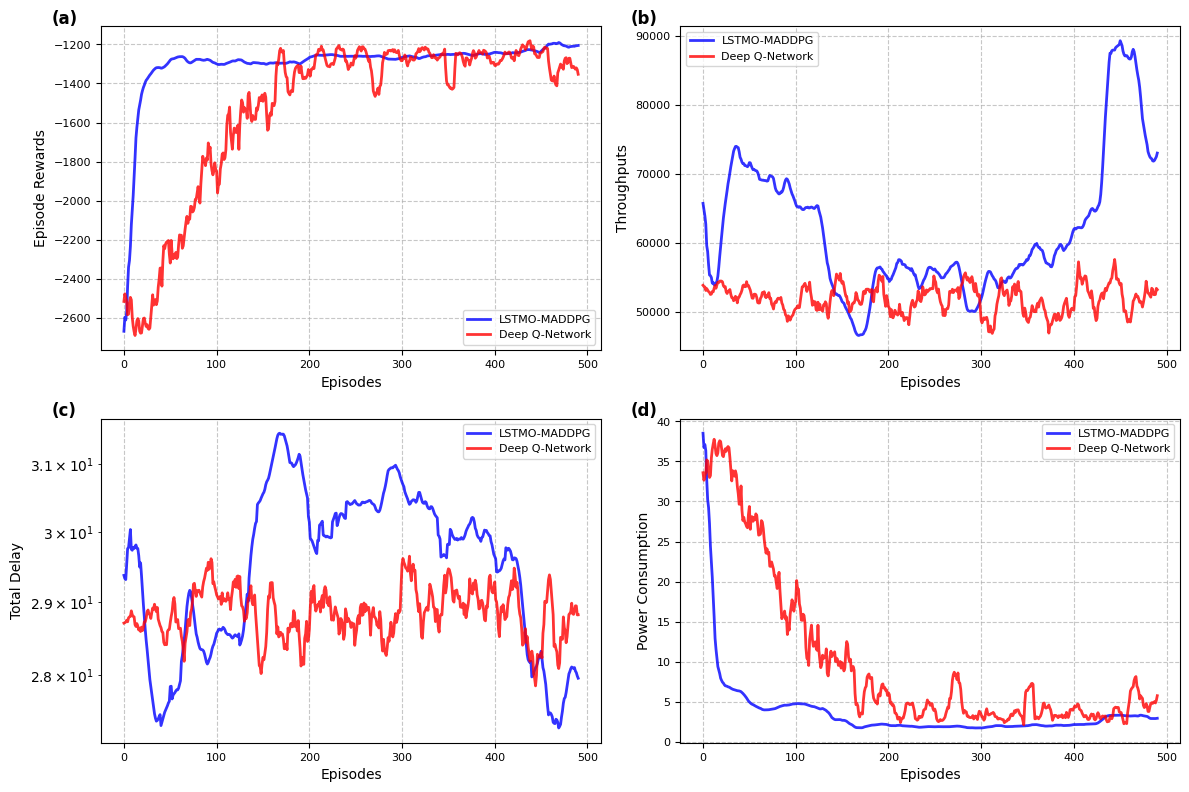

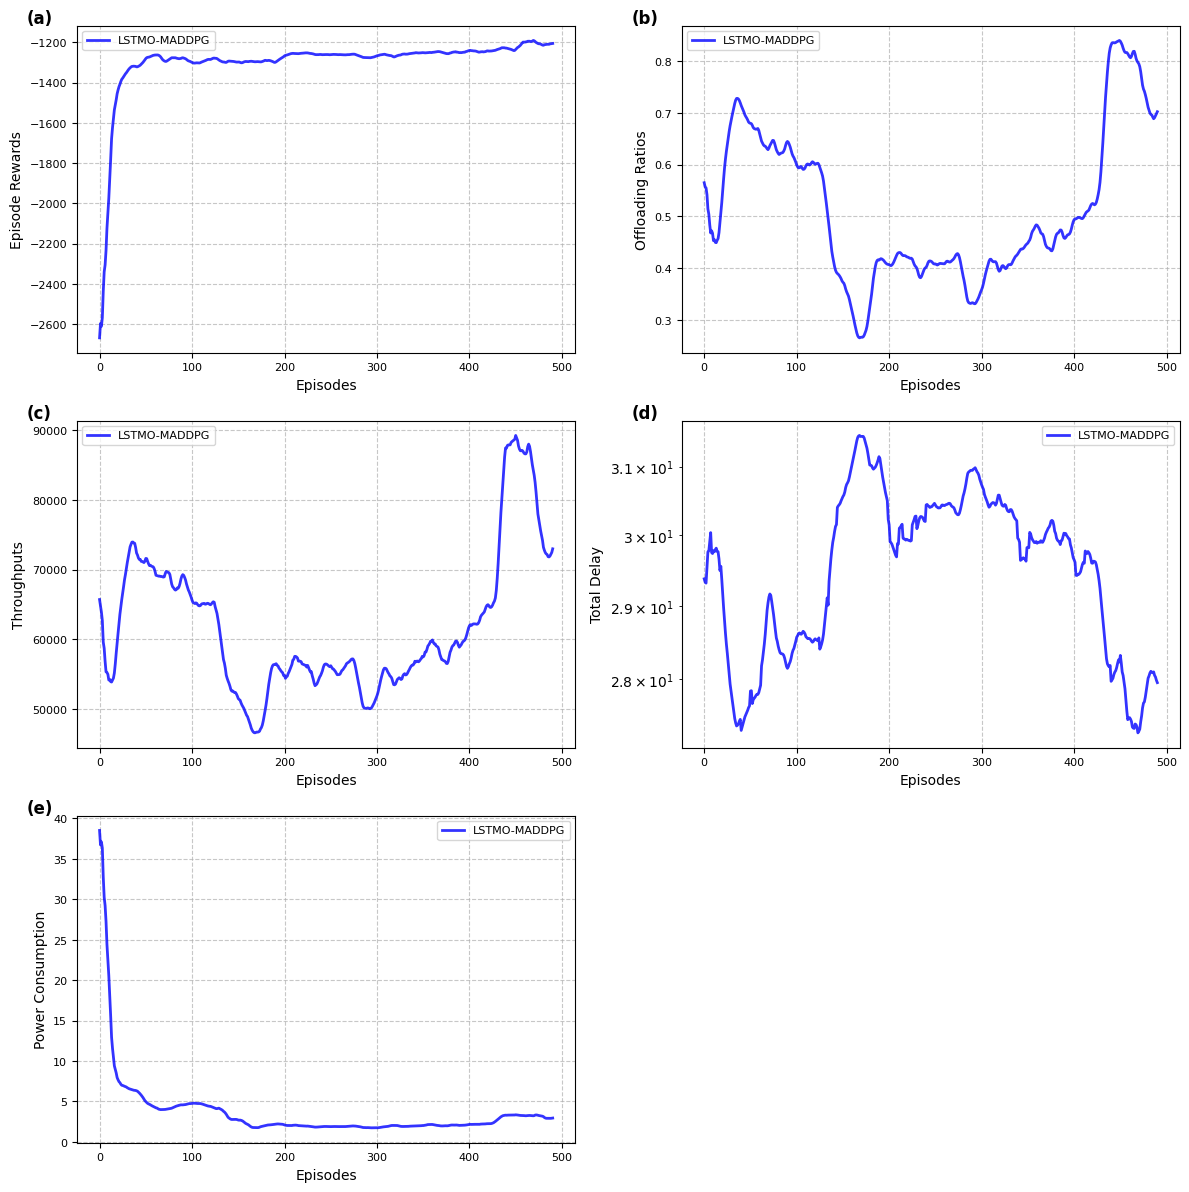

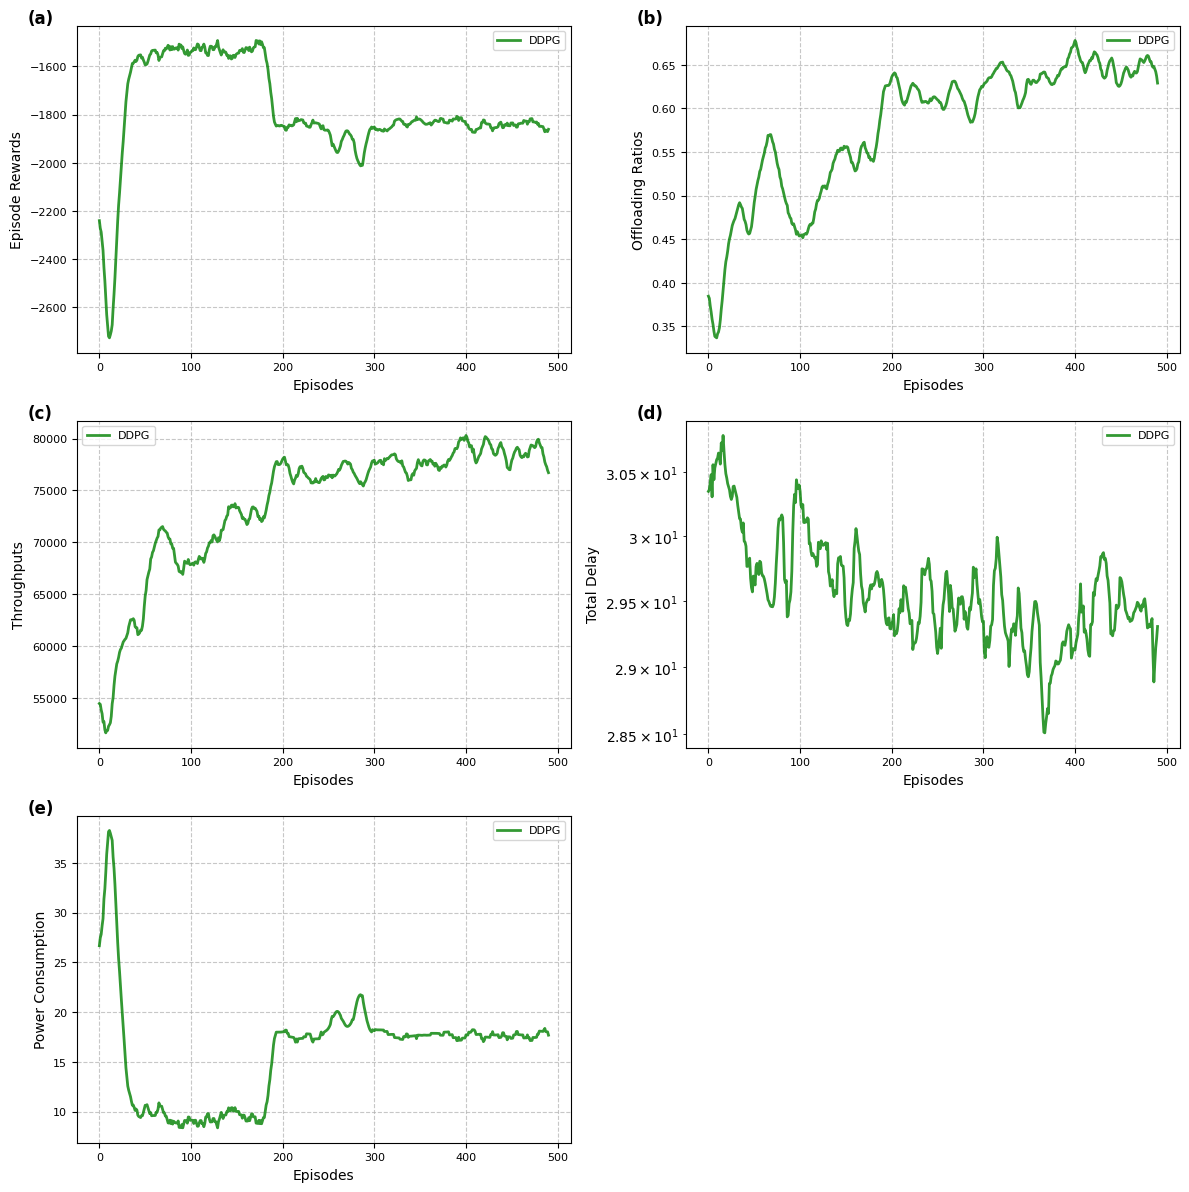

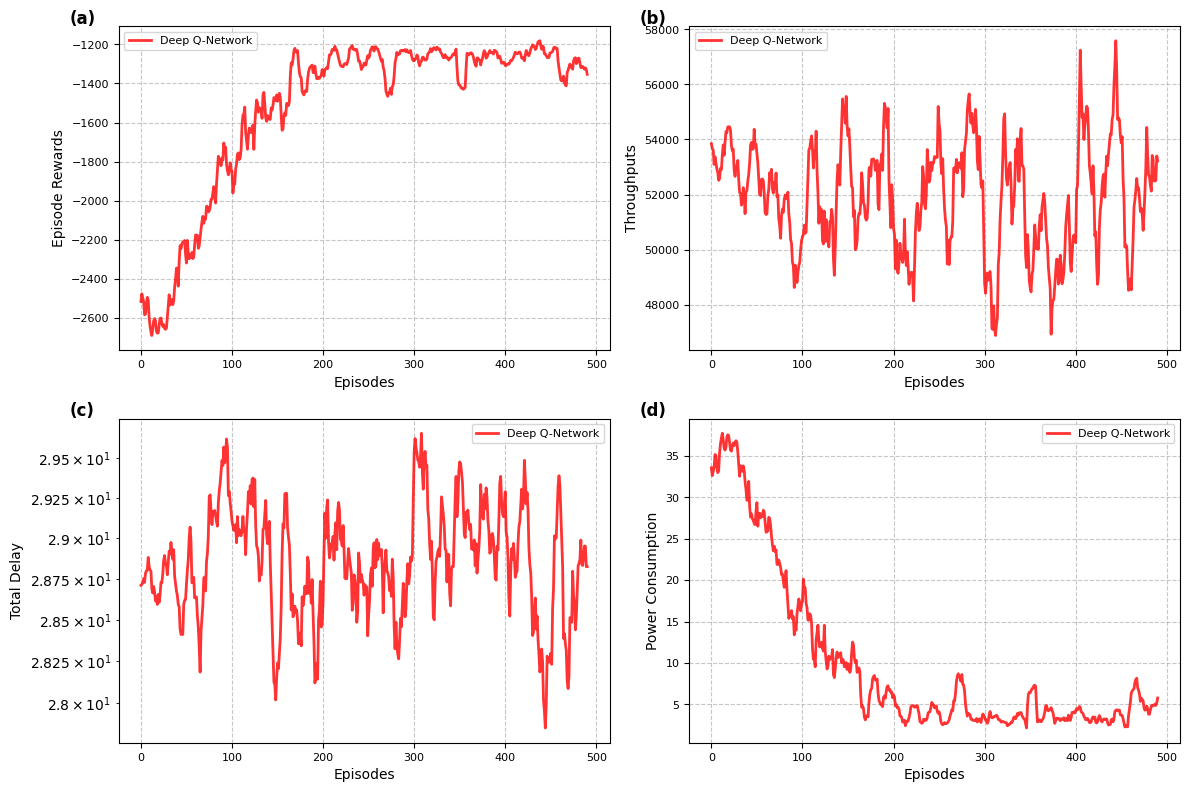

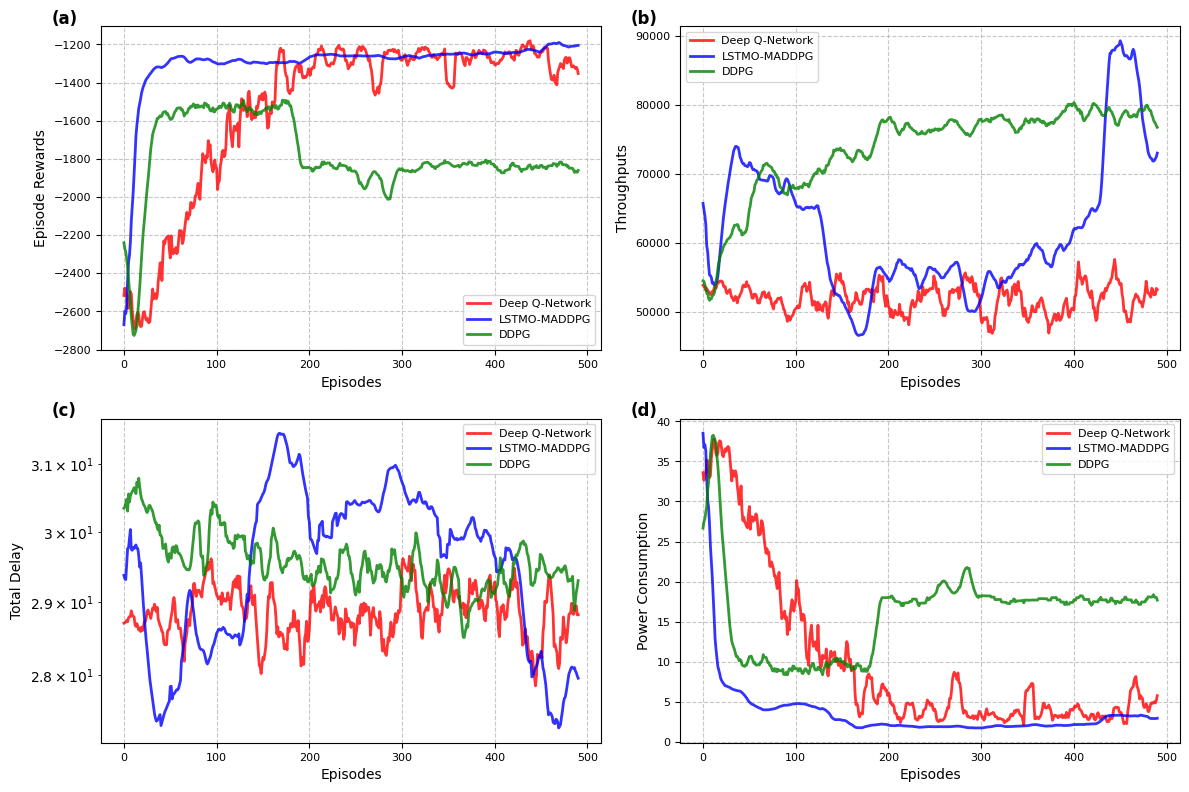

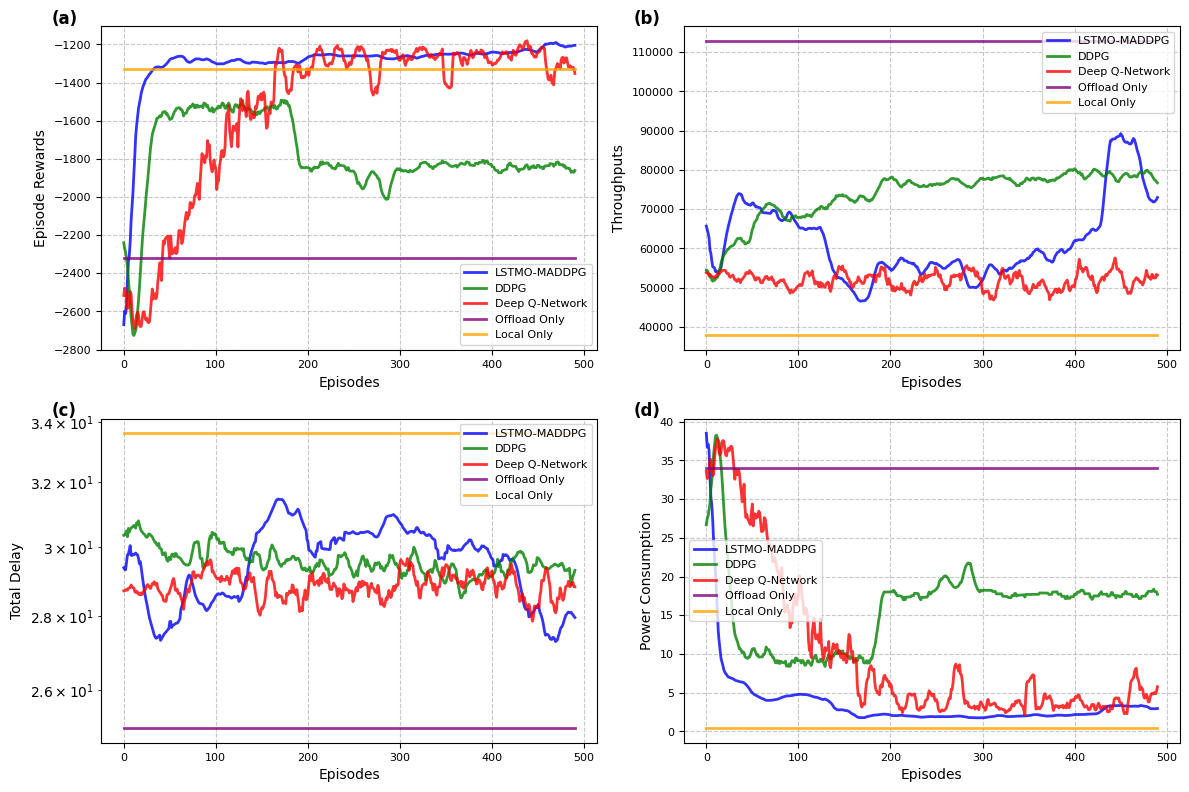

In [4]:
# Create directory for saving plots
import os
output_dir = 'LSTM_plots'
os.makedirs(output_dir, exist_ok=True)

# Function to generate a single grid plot per combination
def generate_single_grid_plot(combo_name, labels):
    has_dqn = 'Deep Q-Network' in labels
    metrics_to_plot = list(metric_titles.keys())
    if has_dqn:
        metrics_to_plot = [m for m in metrics_to_plot if m != 'episode_offloading_ratios']
    
    n_metrics = len(metrics_to_plot)
    n_cols = 2  # Customize as needed
    n_rows = int(np.ceil(n_metrics / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    subplot_labels = [chr(97 + i) for i in range(n_metrics)]
    
    for idx, metric_name in enumerate(metrics_to_plot):
        ax = axes[idx]
        for label in labels:
            if metric_name in all_metrics[label]:
                data = all_metrics[label][metric_name]
                if len(data) >= 10:
                    smoothed_data = moving_average(data, window_size=10)
                    x = np.arange(len(smoothed_data))
                    ax.plot(x, smoothed_data, label=label, color=colors[label], linewidth=2, alpha=0.8)
                else:
                    ax.plot(data, label=label, color=colors[label], linewidth=2, alpha=0.8)
            else:
                print(f"Skipping {metric_name} for {label} as it does not exist.")
        
        ax.text(-0.1, 1.05, f'({subplot_labels[idx]})', transform=ax.transAxes, 
                fontsize=12, fontweight='bold', va='top')
        
        ax.set_xlabel('Episodes', fontsize=10)
        ax.set_ylabel(metric_titles[metric_name], fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        if metric_name == 'episode_Time_':
            ax.set_yscale('log')
        
        ax.tick_params(axis='both', which='major', labelsize=8)
    
    for idx in range(len(metrics_to_plot), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'combined_plot_{combo_name}.png'), bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Generate plots
for combo_name, labels in plot_combinations.items():
    generate_single_grid_plot(combo_name, labels)
